###**Dataset Description**  
##**File descriptions**    
train.csv - the training set  
test.csv - the test set  
data_description.txt - full description of each column, originally prepared by Dean De Cock but lightly edited to match the column names used here   
sample_submission.csv - a benchmark submission from a linear regression on year and month of sale, lot square footage, and number of bedrooms  


##**Data fields**  
Here's a brief version of what you'll find in the data description file.  

**SalePrice - the property's sale price in dollars. This is the target variable that you're trying to predict.**  
MSSubClass: The building class  
MSZoning: The general zoning classification  
LotFrontage: Linear feet of street connected to property  
LotArea: Lot size in square feet  
Alley: Type of alley access  
LotShape: General shape of property  
LandContour: Flatness of the property  
Utilities: Type of utilities available  
LotConfig: Lot configuration  
LandSlope: Slope of property  
Neighborhood: Physical locations within Ames city limits  
Condition1: Proximity to main road or railroad  
Condition2: Proximity to main road or railroad (if a second is present)  
BldgType: Type of dwelling  
HouseStyle: Style of dwelling  
OverallQual: Overall material and finish quality  
OverallCond: Overall condition rating  
YearBuilt: Original construction date  
YearRemodAdd: Remodel date  
RoofStyle: Type of roof  
RoofMatl: Roof material  
Exterior1st: Exterior covering on house   
Exterior2nd: Exterior covering on house (if more than one material)  
MasVnrType: Masonry veneer type  
MasVnrArea: Masonry veneer area in square feet  
ExterQual: Exterior material quality  
ExterCond: Present condition of the material on the exterior  
Foundation: Type of foundation  
BsmtQual: Height of the basement  
BsmtCond: General condition of the basement  
BsmtExposure: Walkout or garden level basement walls  
BsmtFinType1: Quality of basement finished area  
BsmtFinSF1: Type 1 finished square feet  
BsmtFinType2: Quality of second finished area (if present)  
BsmtFinSF2: Type 2 finished square feet  
BsmtUnfSF: Unfinished square feet of basement area  
TotalBsmtSF: Total square feet of basement area  
Heating: Type of heating  
HeatingQC: Heating quality and condition  
CentralAir: Central air conditioning   
Electrical: Electrical system  
1stFlrSF: First Floor square feet   
2ndFlrSF: Second floor square feet  
LowQualFinSF: Low quality finished square feet (all floors)  
GrLivArea: Above grade (ground) living area square feet  
BsmtFullBath: Basement full bathrooms  
BsmtHalfBath: Basement half bathrooms  
FullBath: Full bathrooms above grade  
HalfBath: Half baths above grade  
Bedroom: Number of bedrooms above basement level  
Kitchen: Number of kitchens  
KitchenQual: Kitchen quality  
TotRmsAbvGrd: Total rooms above grade (does not include bathrooms)  
Functional: Home functionality rating  
Fireplaces: Number of fireplaces  
FireplaceQu: Fireplace quality  
GarageType: Garage location  
GarageYrBlt: Year garage was built  
GarageFinish: Interior finish of the garage  
GarageCars: Size of garage in car capacity  
GarageArea: Size of garage in square feet  
GarageQual: Garage quality  
GarageCond: Garage condition  
PavedDrive: Paved driveway  
WoodDeckSF: Wood deck area in square feet  
OpenPorchSF: Open porch area in square feet  
EnclosedPorch: Enclosed porch area in square feet  
3SsnPorch: Three season porch area in square feet  
ScreenPorch: Screen porch area in square feet  
PoolArea: Pool area in square feet  
PoolQC: Pool quality  
Fence: Fence quality  
MiscFeature: Miscellaneous feature not covered in other categories  
MiscVal: $Value of miscellaneous feature  
MoSold: Month Sold  
YrSold: Year Sold  
SaleType: Type of sale  
SaleCondition: Condition of sale  



### **Loading libraries**

In [723]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()


In [724]:
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
from scipy.spatial.distance import squareform
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
! pip install optuna
import optuna
from sklearn import ensemble
from sklearn import datasets
from sklearn import ensemble
from sklearn import datasets
from sklearn import model_selection

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [725]:
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from xgboost import XGBRegressor
!pip install catboost
from catboost import CatBoostRegressor
from sklearn.feature_selection import VarianceThreshold

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


### **Let us load the data**

In [726]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [727]:
data = pd.read_csv('/content/drive/MyDrive/ML_project/ML_regression/Kaggle/House_Prices _Advanced_Regression_Techniques/train.csv') 
test = pd.read_csv('/content/drive/MyDrive/ML_project/ML_regression/Kaggle/House_Prices _Advanced_Regression_Techniques/test.csv')

### **Understand the data by observing a few rows**

In [728]:
# View first 5 rows

data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [729]:
# View last 5 rows 

data.tail()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125
1459,1460,20,RL,75.0,9937,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2008,WD,Normal,147500


### **Let us check the data types and and missing values of each column** 

In [730]:
# Check the datatypes of each column.

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [731]:
data.isnull().sum()[data.isnull().sum()>=1].sort_values(ascending=False)

PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
FireplaceQu      690
LotFrontage      259
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
BsmtExposure      38
BsmtFinType2      38
BsmtFinType1      37
BsmtCond          37
BsmtQual          37
MasVnrArea         8
MasVnrType         8
Electrical         1
dtype: int64

In [732]:
# Remove Id column from data.
data.drop(columns = ['Id'], inplace = True)

In [733]:
# Explore basic summary statistics of numeric variables.
data.describe().T

,count,mean,std,min,25%,50%,75%,max
MSSubClass,1460.0,56.897260,42.300571,20.0,20.00,50.0,70.00,190.0
LotFrontage,1201.0,70.049958,24.284752,21.0,59.00,69.0,80.00,313.0
LotArea,1460.0,10516.828082,9981.264932,1300.0,7553.50,9478.5,11601.50,215245.0
OverallQual,1460.0,6.099315,1.382997,1.0,5.00,6.0,7.00,10.0
OverallCond,1460.0,5.575342,1.112799,1.0,5.00,5.0,6.00,9.0
YearBuilt,1460.0,1971.267808,30.202904,1872.0,1954.00,1973.0,2000.00,2010.0
YearRemodAdd,1460.0,1984.865753,20.645407,1950.0,1967.00,1994.0,2004.00,2010.0
MasVnrArea,1452.0,103.685262,181.066207,0.0,0.00,0.0,166.00,1600.0
BsmtFinSF1,1460.0,443.639726,456.098091,0.0,0.00,383.5,712.25,5644.0
BsmtFinSF2,1460.0,46.549315,161.319273,0.0,0.00,0.0,0.00,1474.0


In [734]:
# Explore basic summary statistics of categorical variables. 
data.describe(include= ['object']).T

,count,unique,top,freq
MSZoning,1460,5,RL,1151
Street,1460,2,Pave,1454
Alley,91,2,Grvl,50
LotShape,1460,4,Reg,925
LandContour,1460,4,Lvl,1311
Utilities,1460,2,AllPub,1459
LotConfig,1460,5,Inside,1052
LandSlope,1460,3,Gtl,1382
Neighborhood,1460,25,NAmes,225
Condition1,1460,9,Norm,1260


In [735]:
cols_cat = data.select_dtypes(include = ['object']).columns

for column in cols_cat:
    
    print("For column:", column)
    
    print(data[column].value_counts())
    
    print('-'*50)

For column: MSZoning
RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: MSZoning, dtype: int64
--------------------------------------------------
For column: Street
Pave    1454
Grvl       6
Name: Street, dtype: int64
--------------------------------------------------
For column: Alley
Grvl    50
Pave    41
Name: Alley, dtype: int64
--------------------------------------------------
For column: LotShape
Reg    925
IR1    484
IR2     41
IR3     10
Name: LotShape, dtype: int64
--------------------------------------------------
For column: LandContour
Lvl    1311
Bnk      63
HLS      50
Low      36
Name: LandContour, dtype: int64
--------------------------------------------------
For column: Utilities
AllPub    1459
NoSeWa       1
Name: Utilities, dtype: int64
--------------------------------------------------
For column: LotConfig
Inside     1052
Corner      263
CulDSac      94
FR2          47
FR3           4
Name: LotConfig, dtype: int64
--------------

## **Exploratory Data Analysis**

In [736]:
# Let us write a function that will help us create a boxplot and histogram for any input numerical variable.
# This function takes the numerical column as the input and returns the boxplots and histograms for the variable.

def histogram_boxplot(feature, figsize = (15, 10), bins = None):
    
    """ Boxplot and histogram combined
    
    feature: 1-d feature array
    
    figsize: size of fig (default (9, 8))
    
    bins: number of bins (default None / auto)
    
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(nrows = 2, # Number of rows of the subplot grid = 2
                                           sharex = True, # X-axis will be shared among all subplots
                                           gridspec_kw = {"height_ratios": (.25, .75)}, 
                                           figsize = figsize 
                                           ) # Creating the 2 subplots
    
    sns.boxplot(feature, ax = ax_box2, showmeans = True, color = 'violet') # Boxplot will be created and a symbol will indicate the mean value of the column
    
    sns.distplot(feature, kde = F, ax = ax_hist2, bins = bins, palette = "winter") if bins else sns.distplot(feature, kde = False, ax = ax_hist2) # For histogram
    
    ax_hist2.axvline(np.mean(feature), color = 'green', linestyle = '--') # Add mean to the histogram
    
    ax_hist2.axvline(np.median(feature), color = 'black', linestyle = '-') # Add median to the histogram







/usr/local/lib/python3.9/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


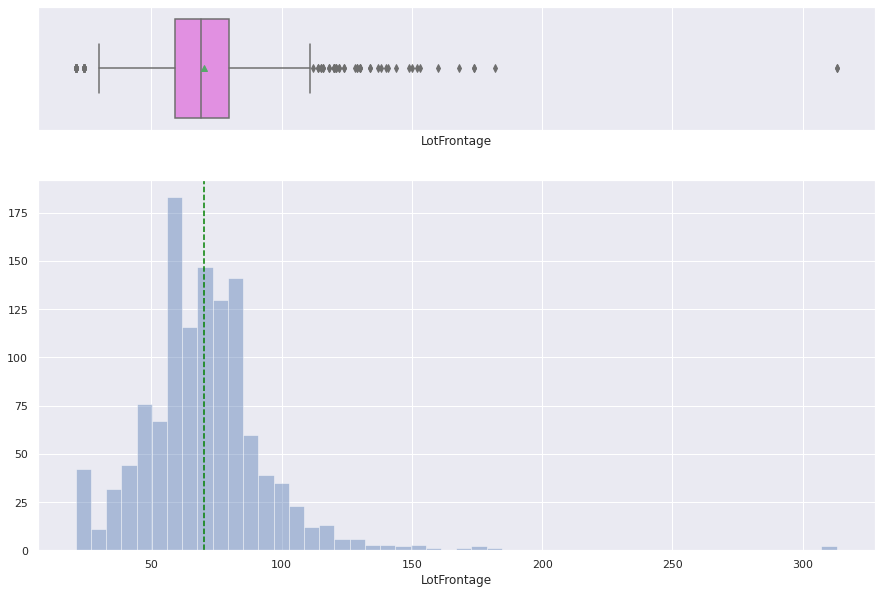

In [737]:
# Plot histogram and box-plot for 'LotFrontage'
histogram_boxplot(data['LotFrontage'])

/usr/local/lib/python3.9/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.9/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/

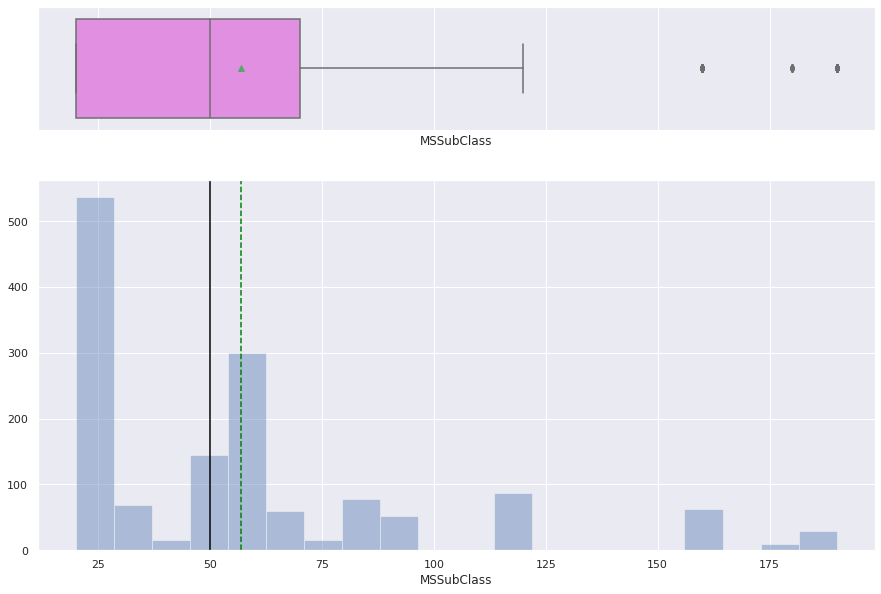

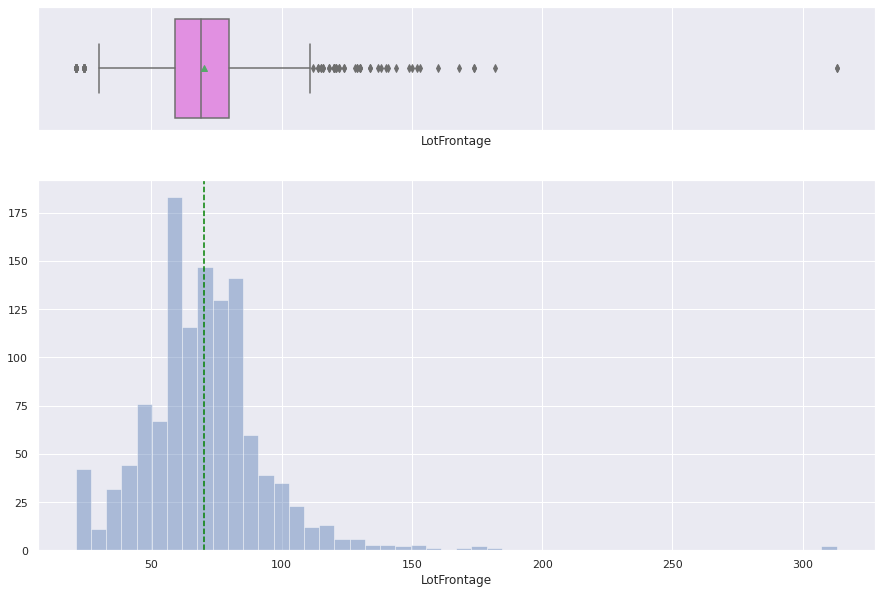

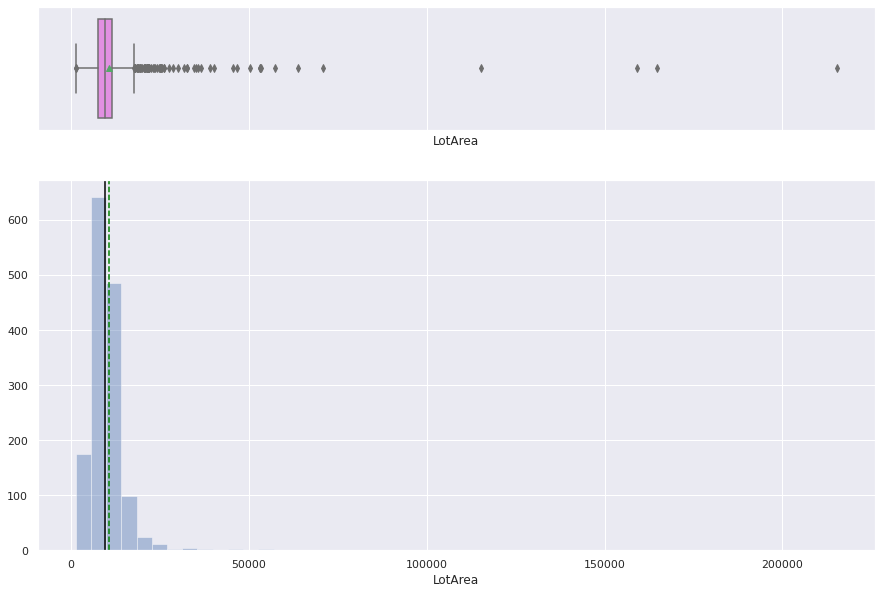

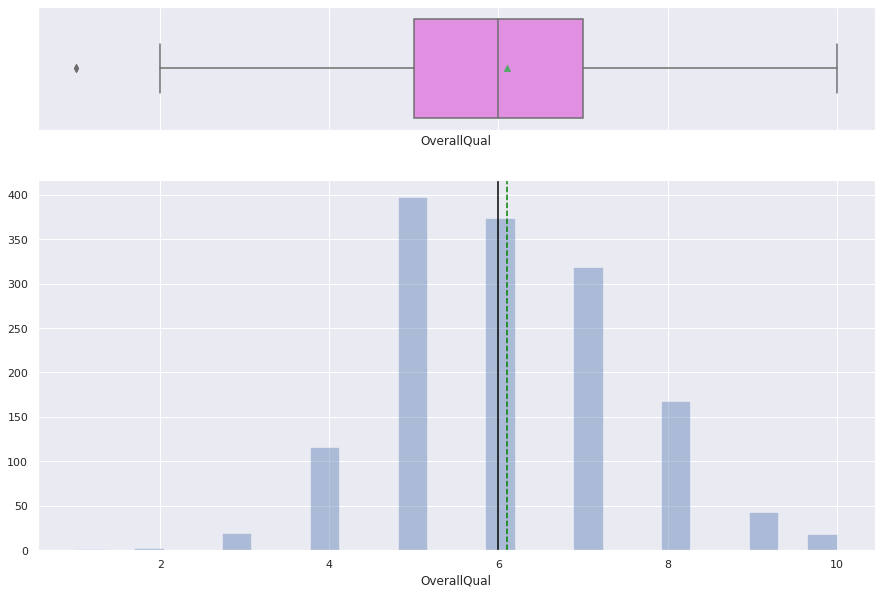

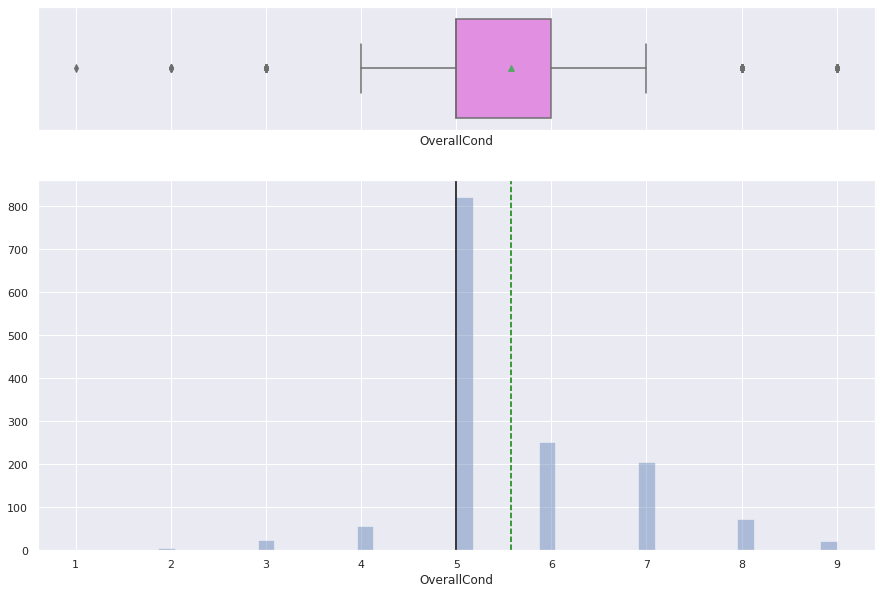

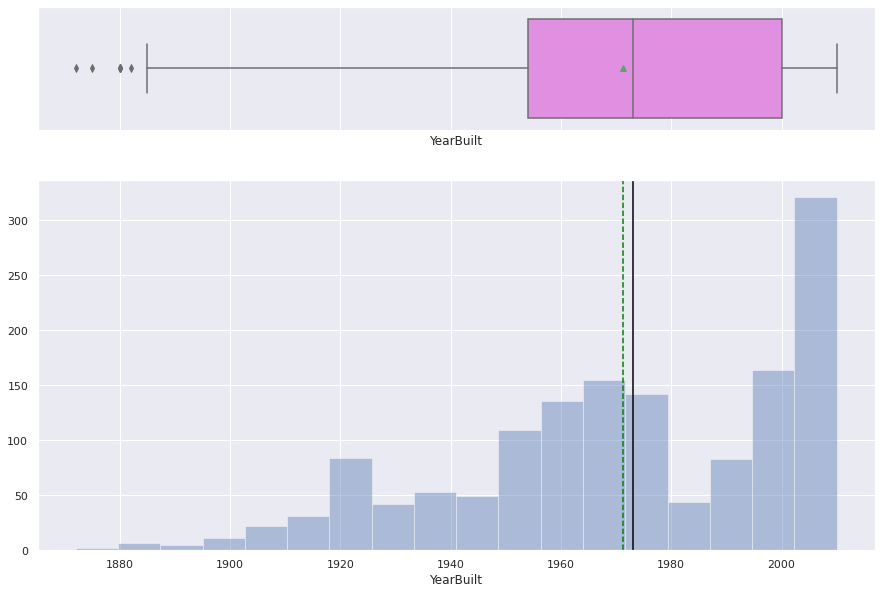

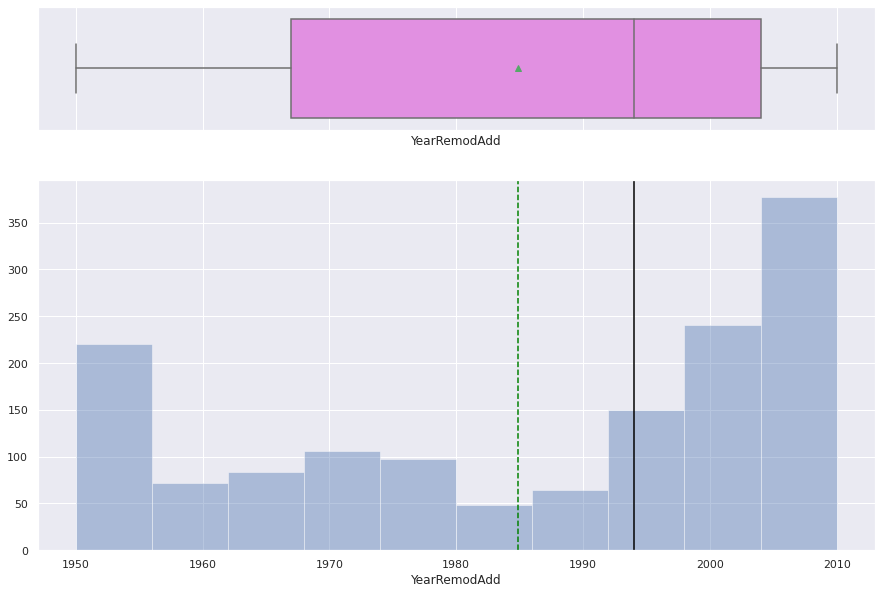

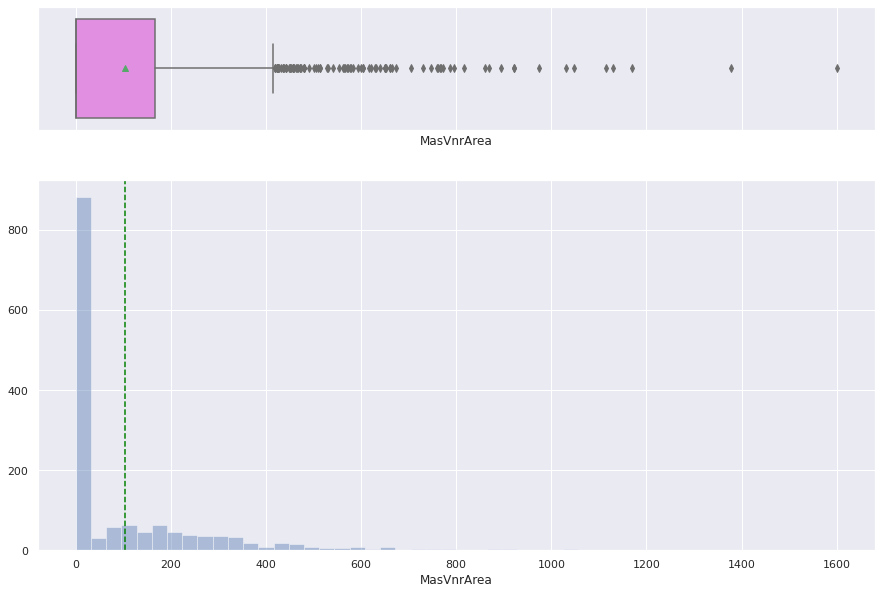

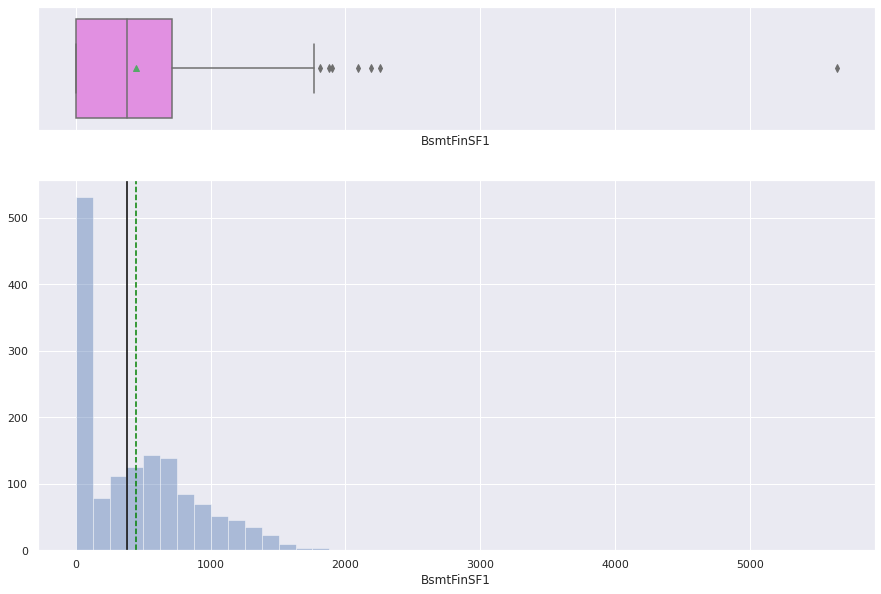

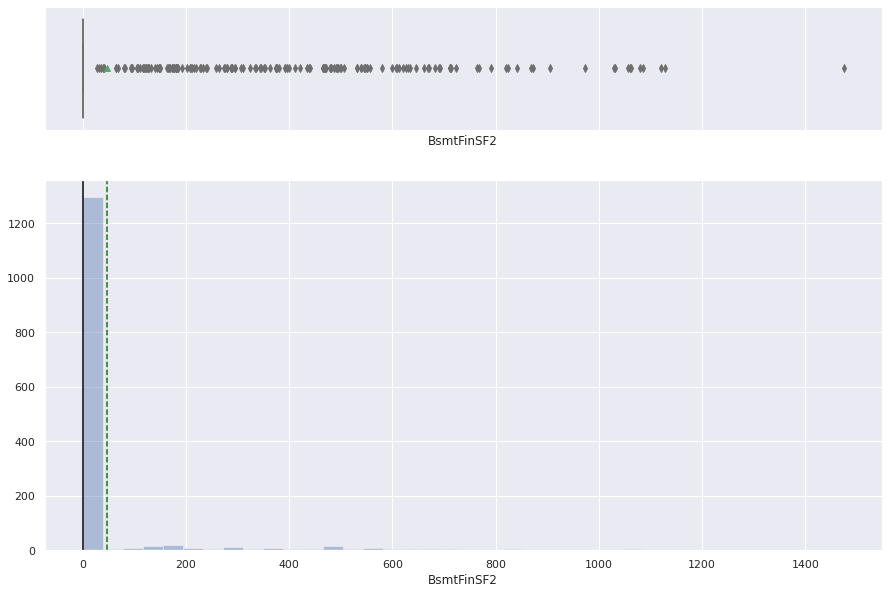

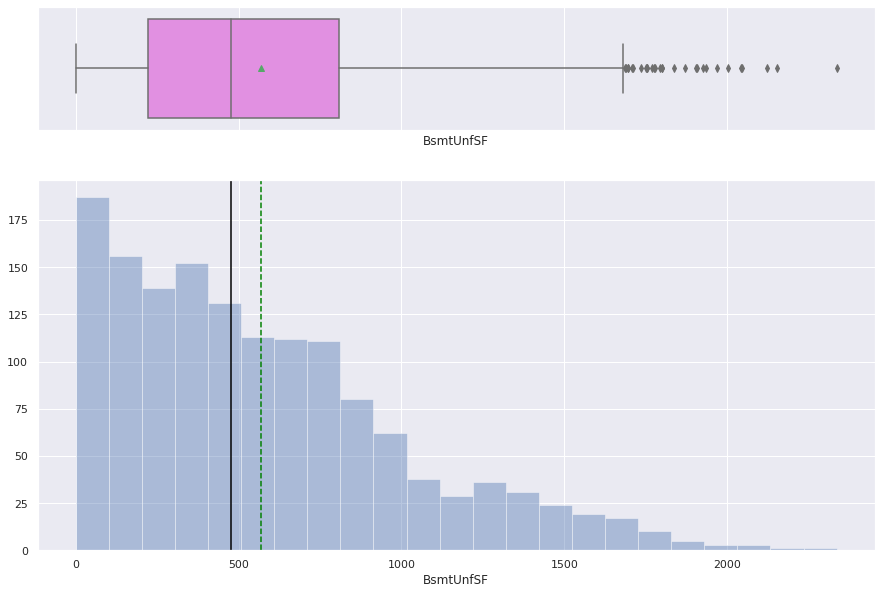

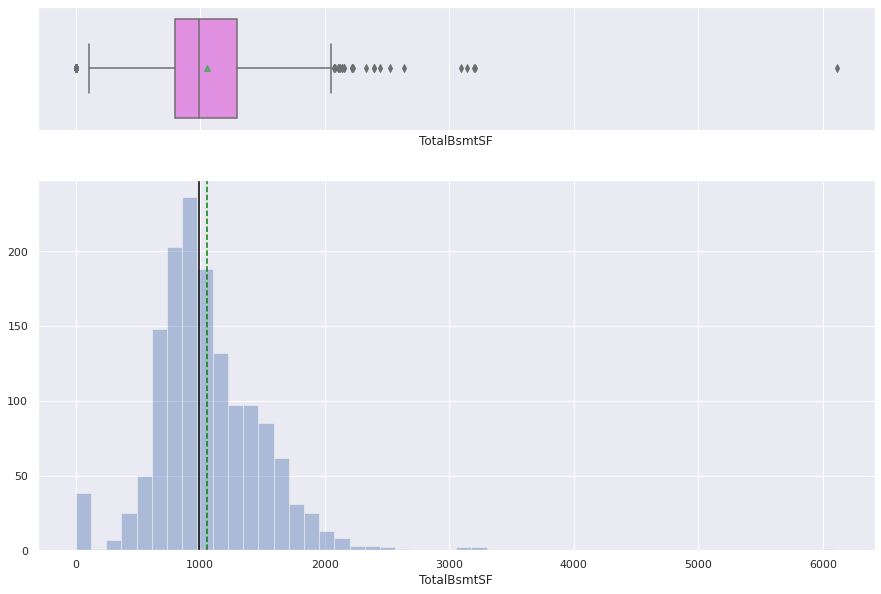

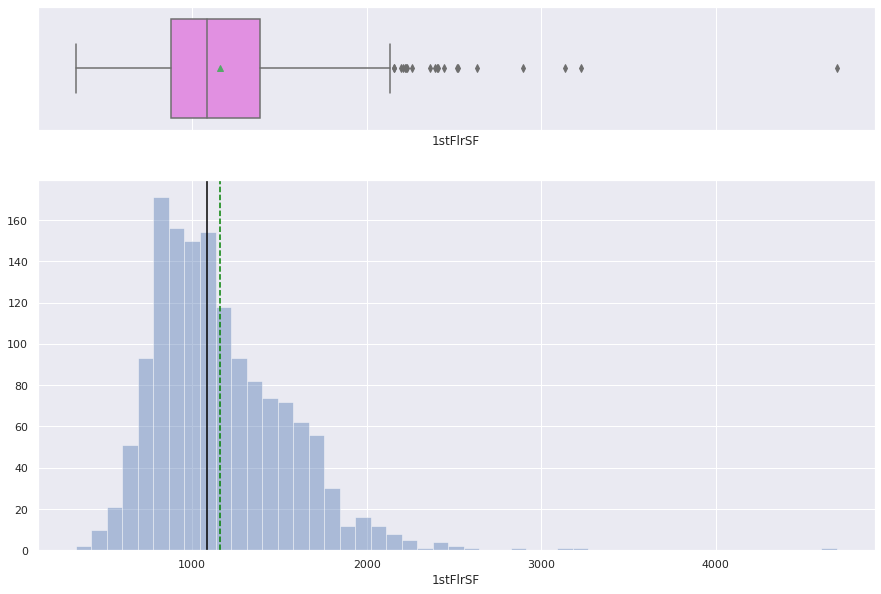

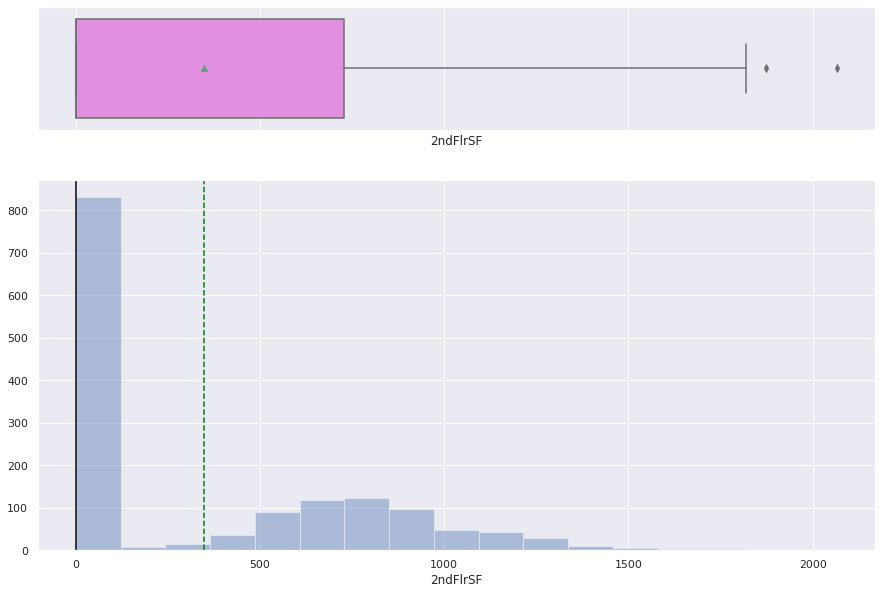

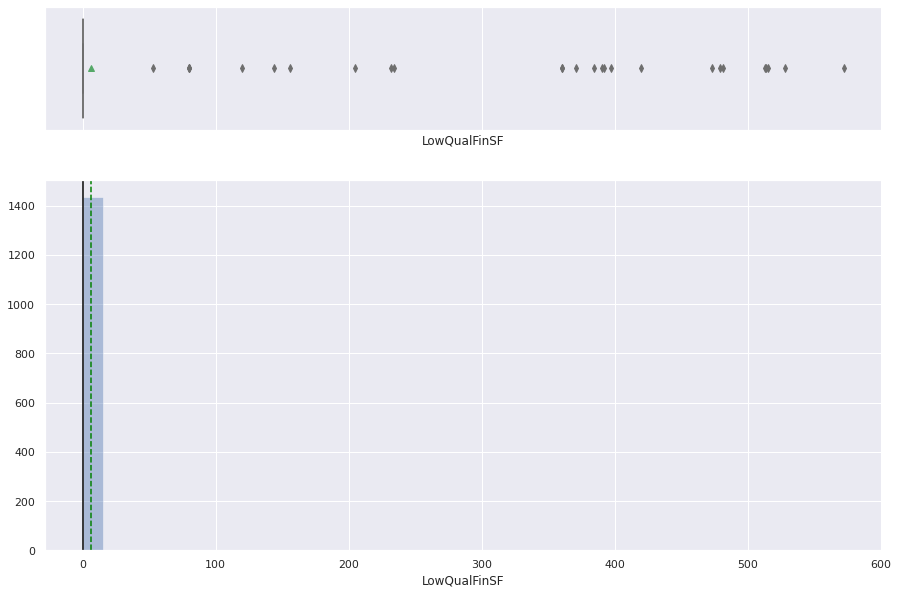

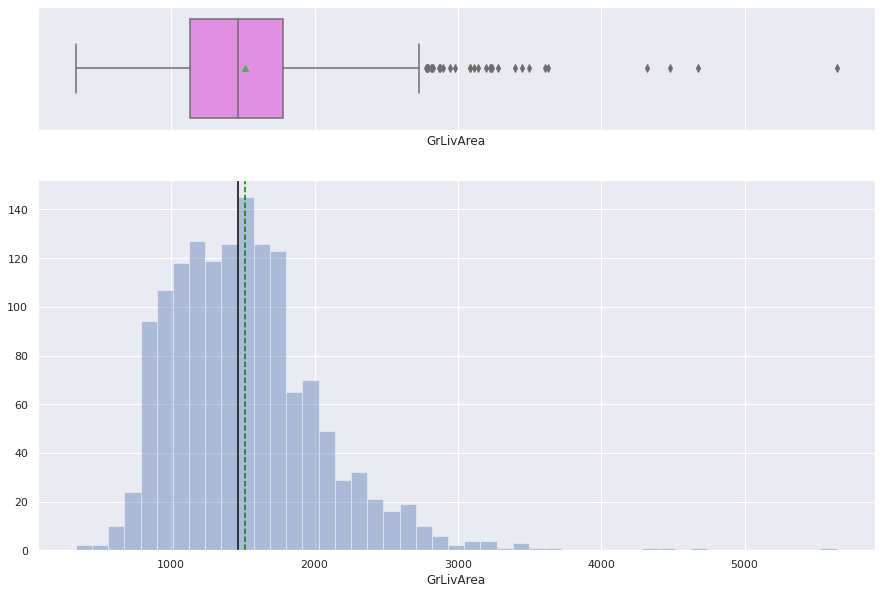

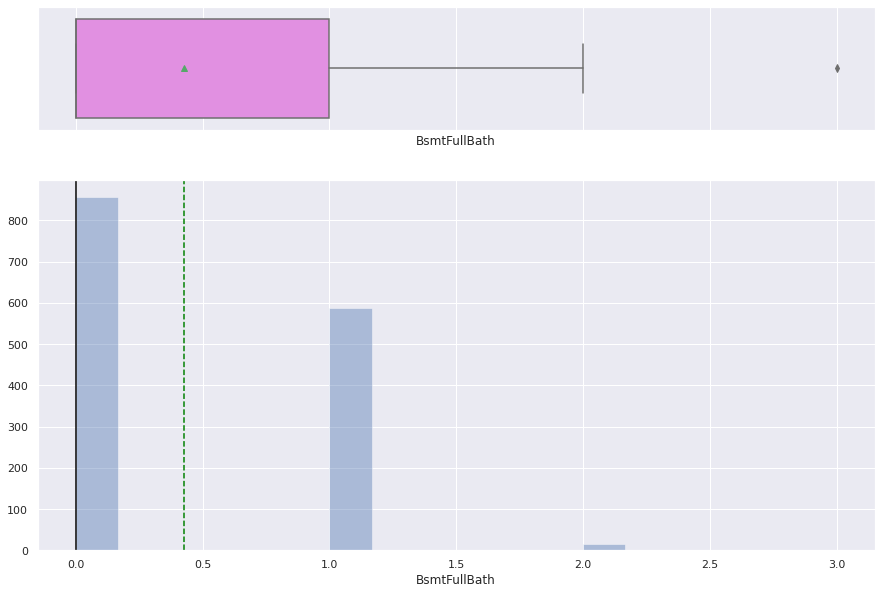

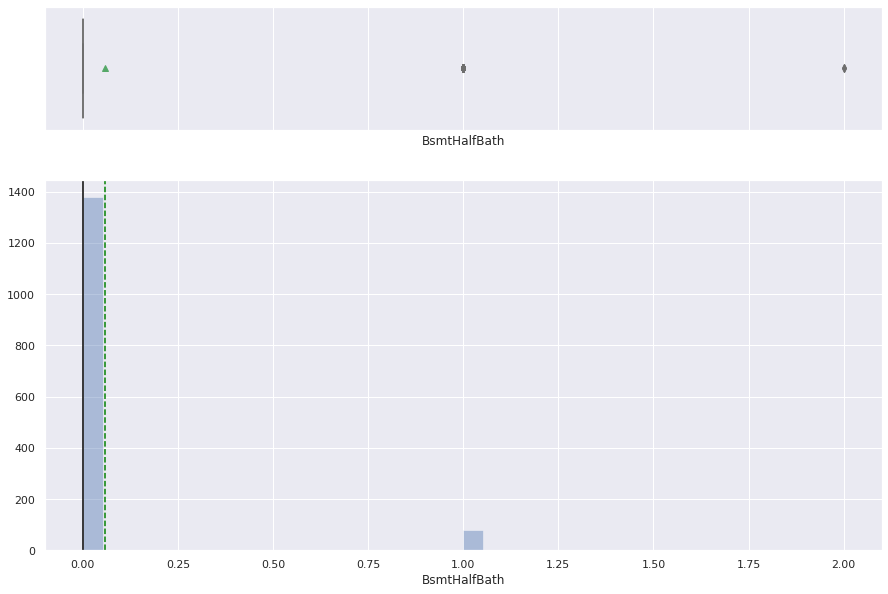

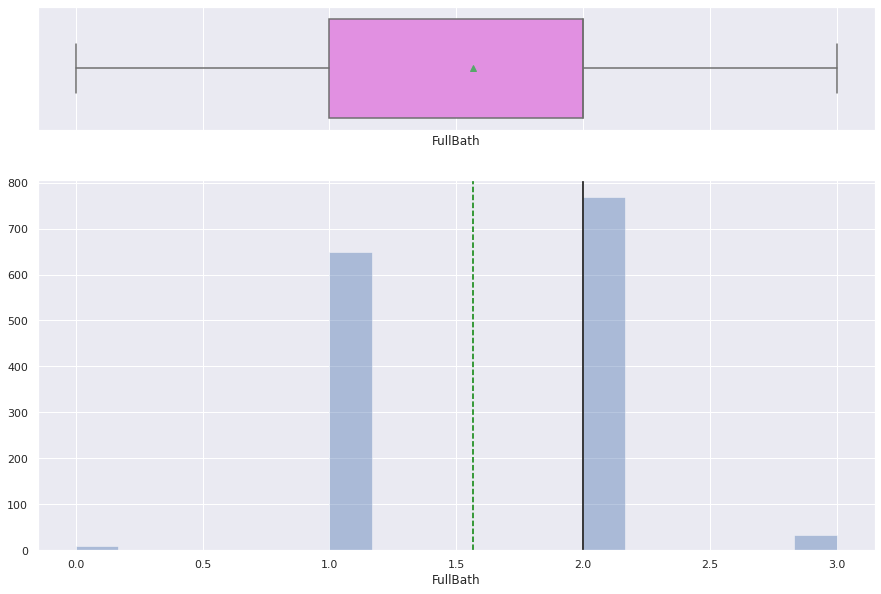

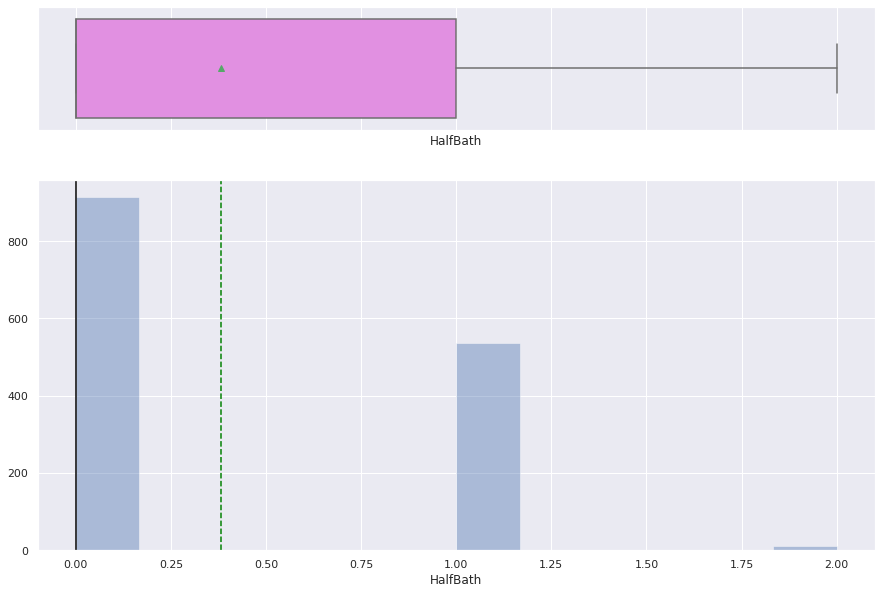

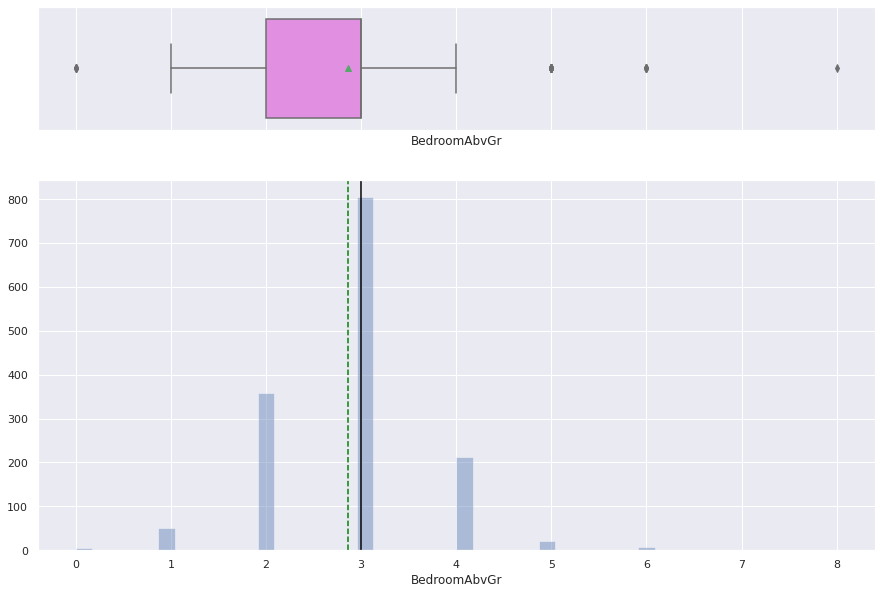

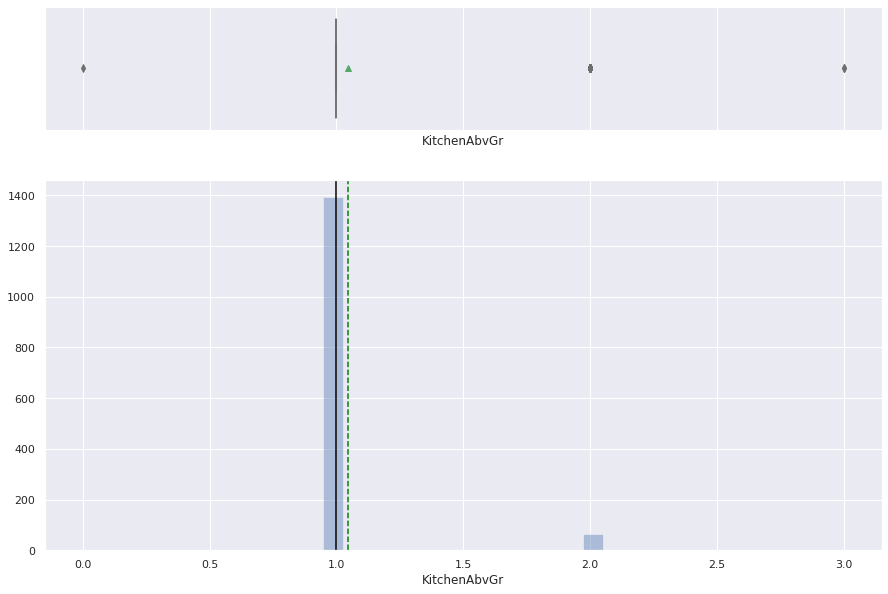

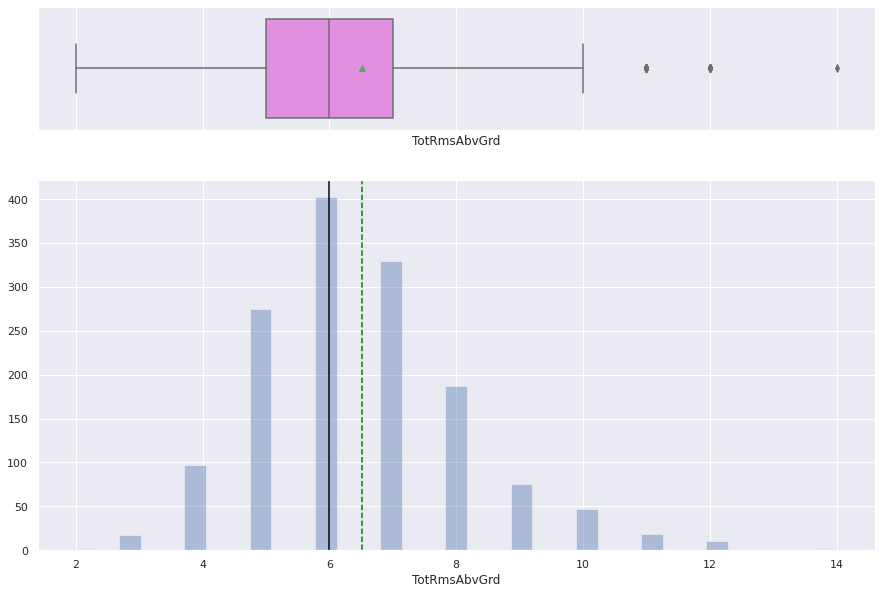

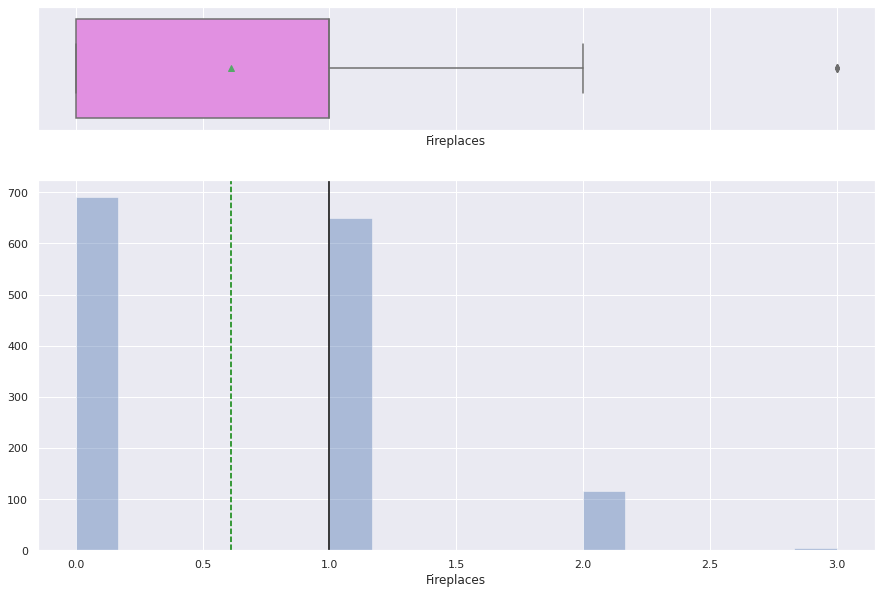

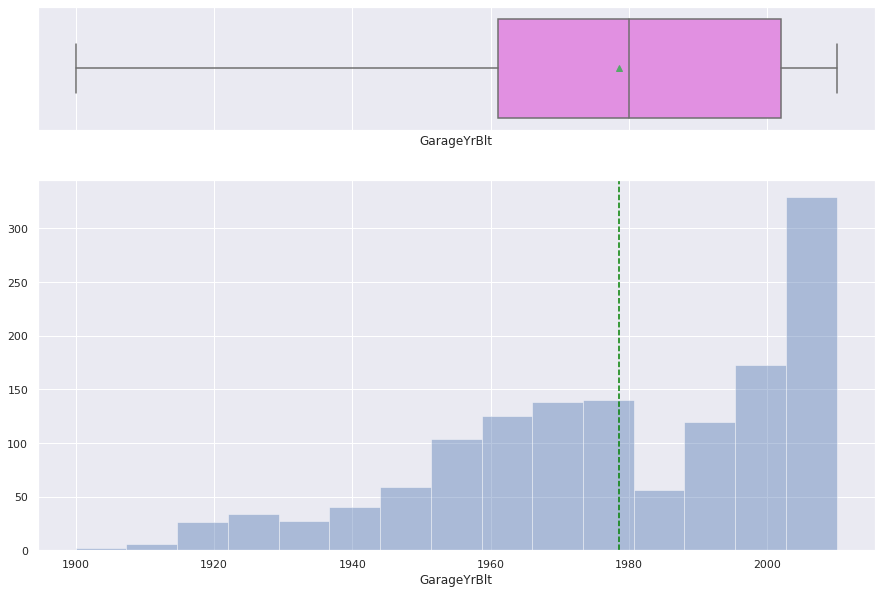

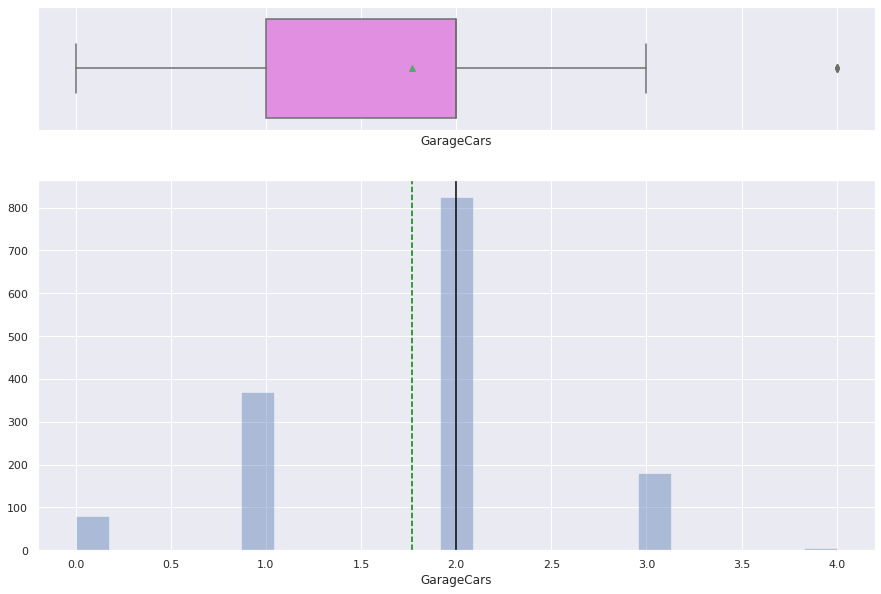

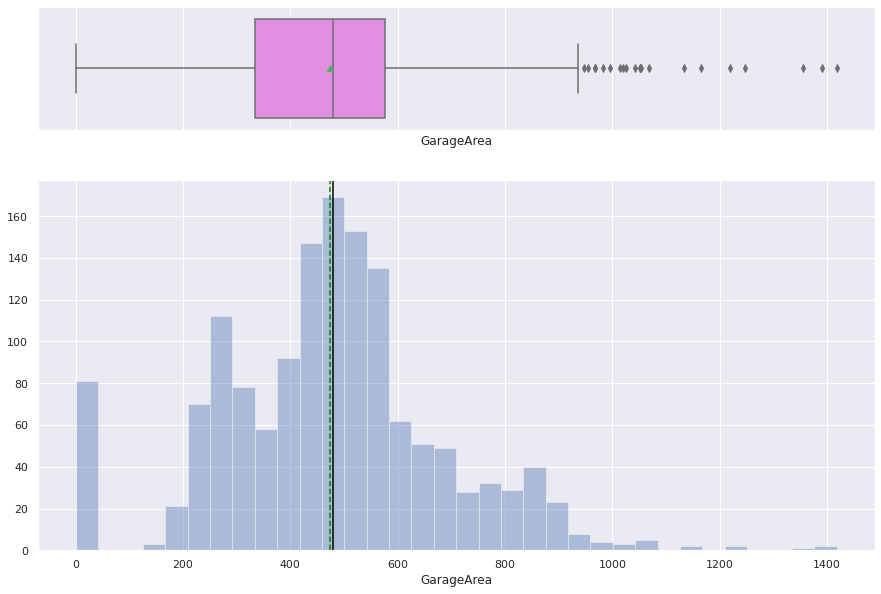

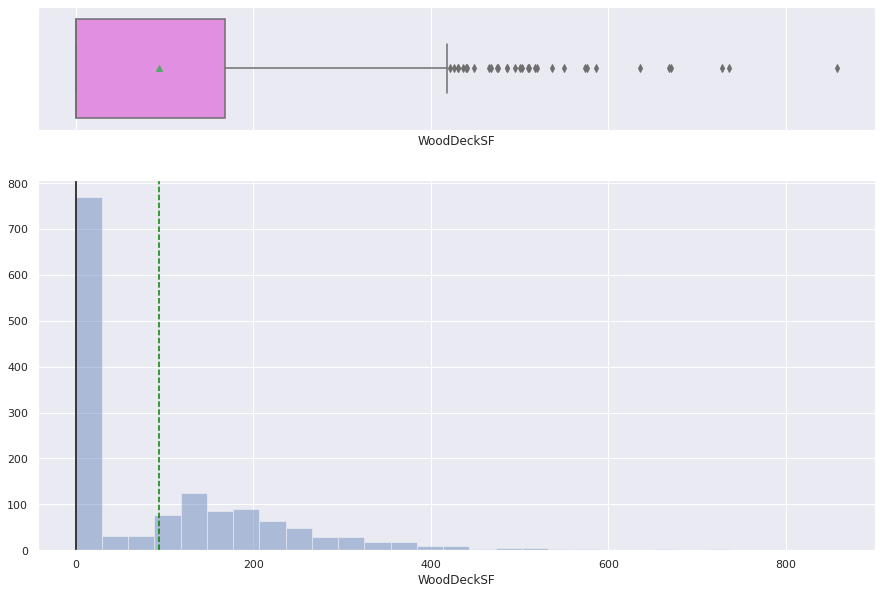

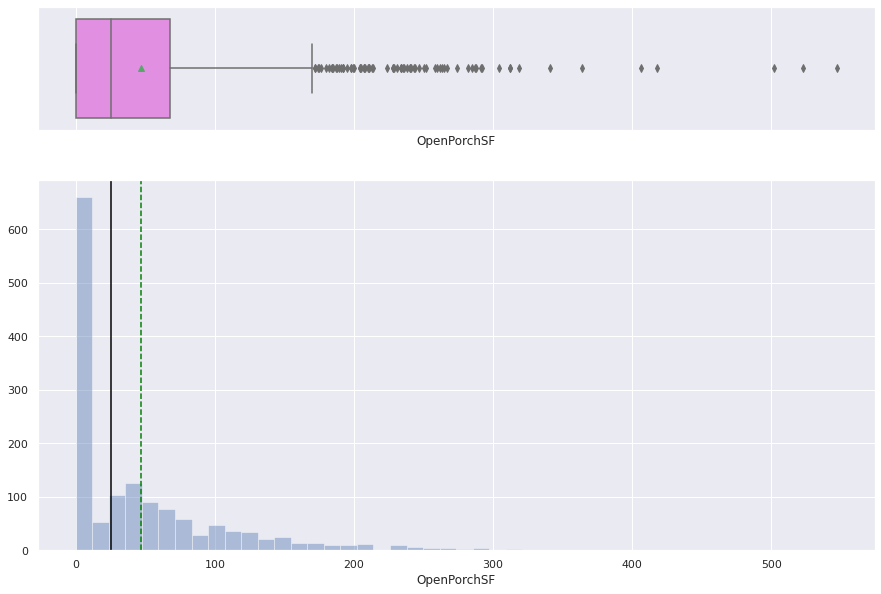

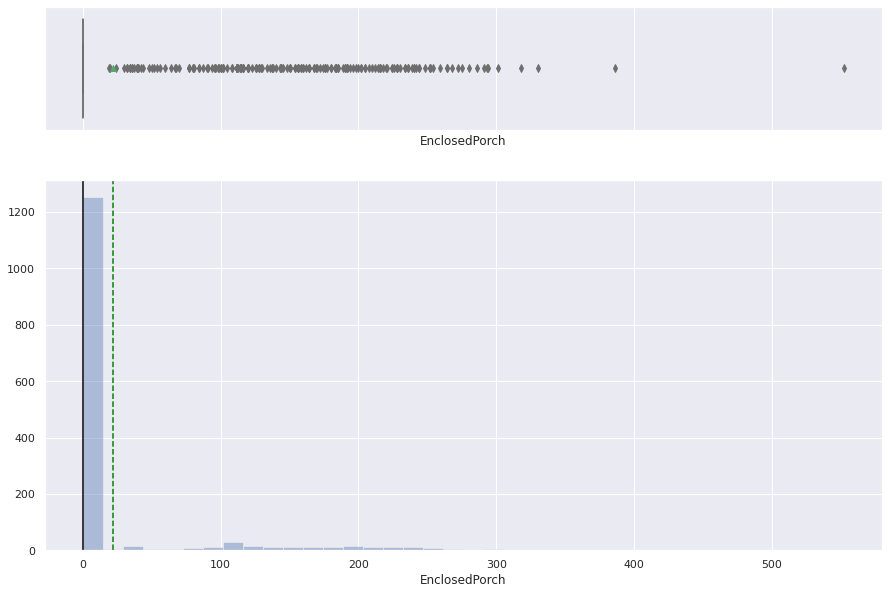

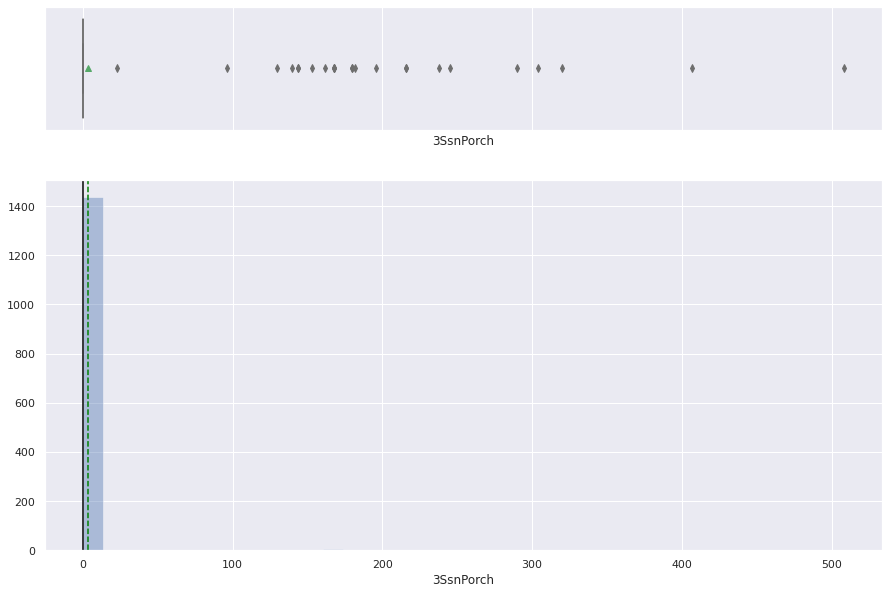

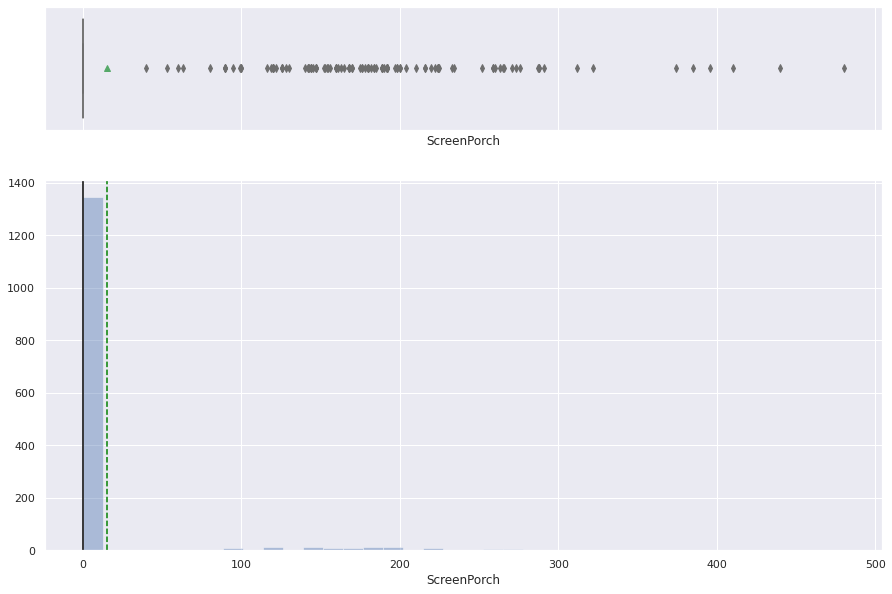

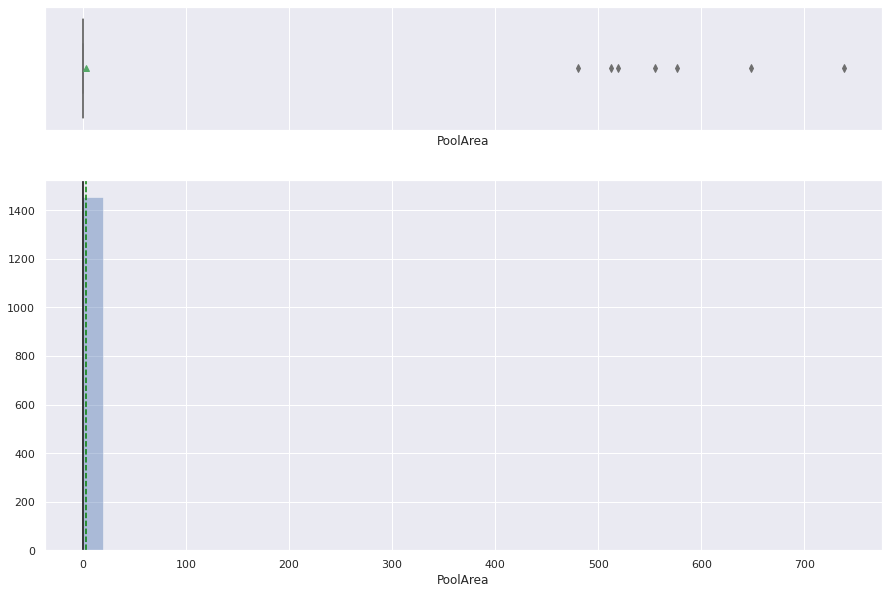

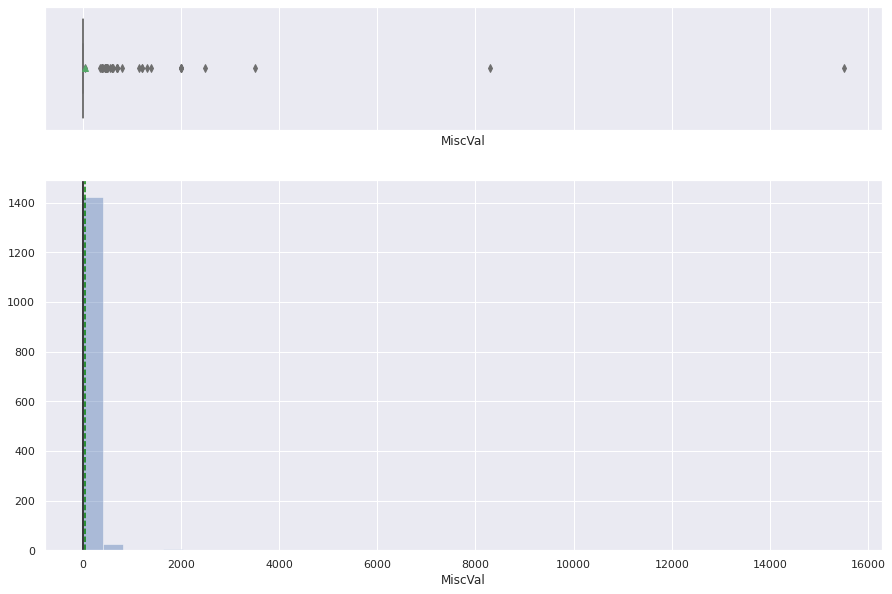

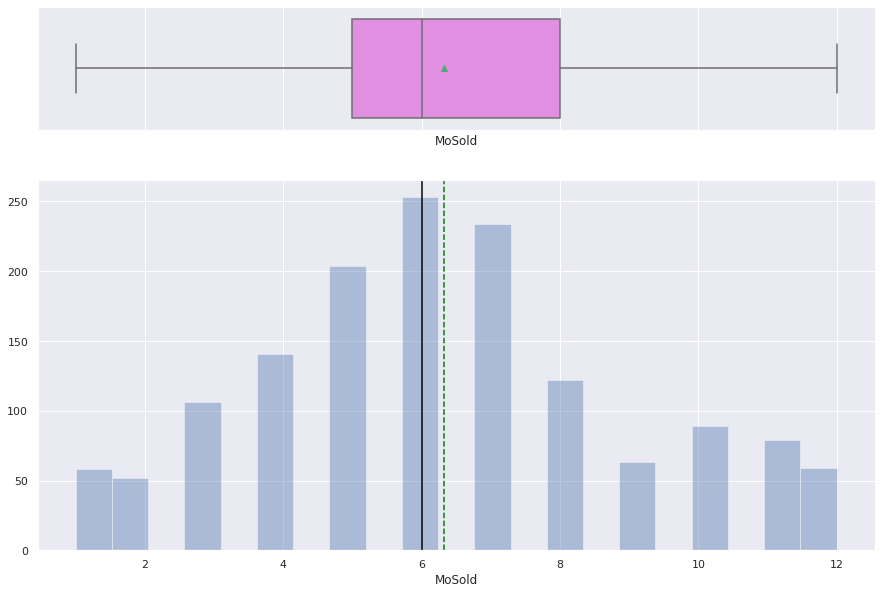

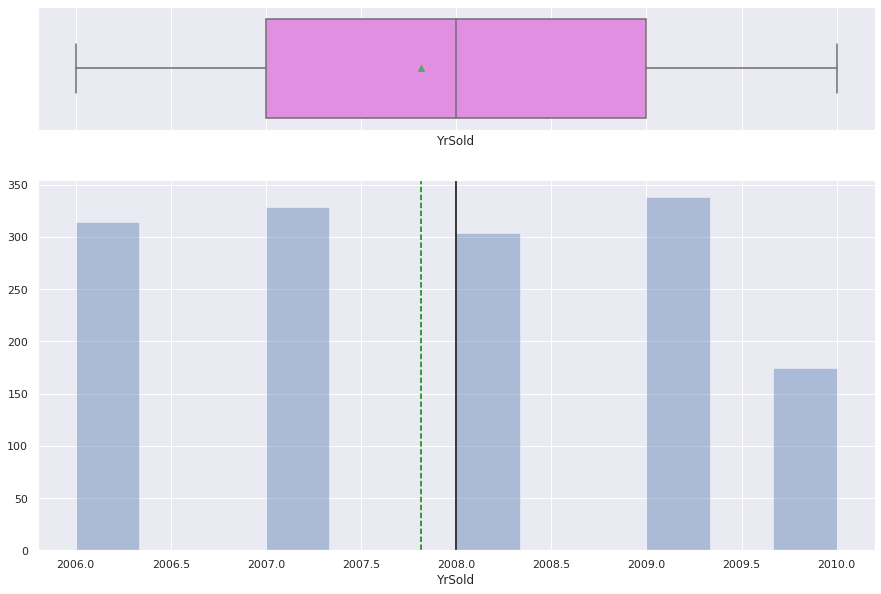

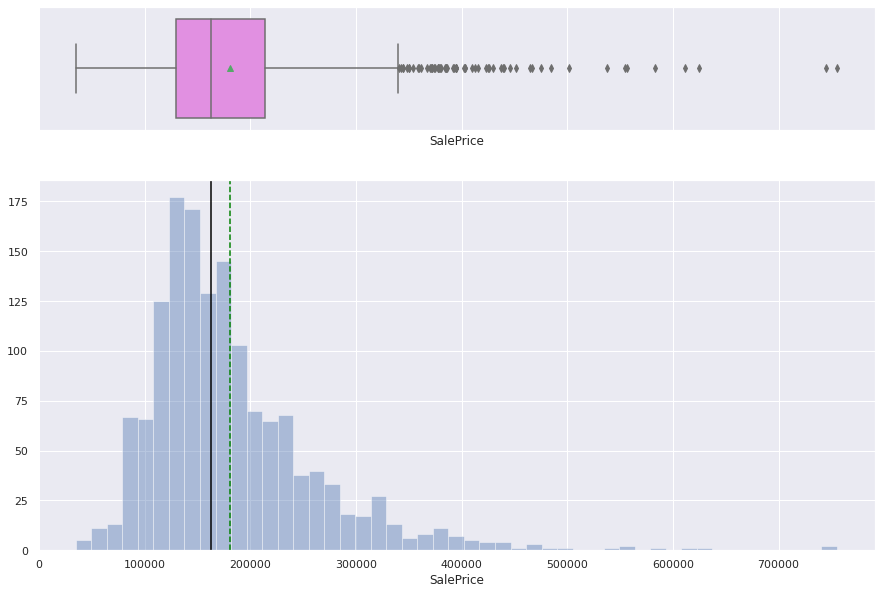

In [738]:
cols_num= data.select_dtypes(['number']).columns

for i in cols_num: 
  histogram_boxplot(data[i])



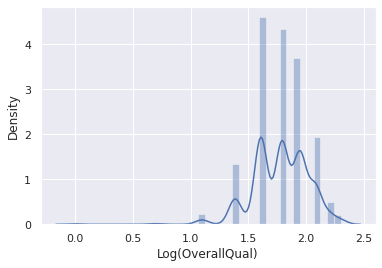

In [739]:
sns.distplot(np.log(data["OverallQual"]), axlabel = "Log(OverallQual)");

In [740]:
data["OverallQual_log"] = np.log(data["OverallQual"])

/usr/local/lib/python3.9/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


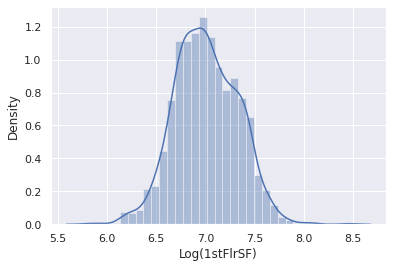

In [741]:
sns.distplot(np.log(data["1stFlrSF"]), axlabel = "Log(1stFlrSF)");

In [742]:
data["1stFlrSF_log"] = np.log(data["1stFlrSF"])

/usr/local/lib/python3.9/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


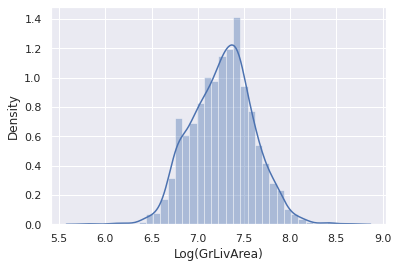

In [743]:
sns.distplot(np.log(data["GrLivArea"]), axlabel = "Log(GrLivArea)");

In [744]:
data["GrLivArea_log"] = np.log(data["GrLivArea"])

/usr/local/lib/python3.9/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


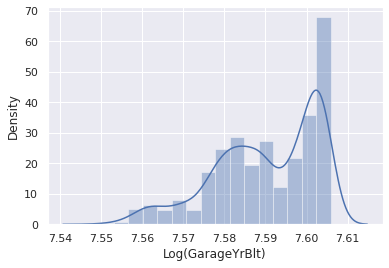

In [745]:
sns.distplot(np.log(data["GarageYrBlt"]), axlabel = "Log(GarageYrBlt)");

In [746]:
data["GarageYrBlt_log"] = np.log(data["GarageYrBlt"])

/usr/local/lib/python3.9/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


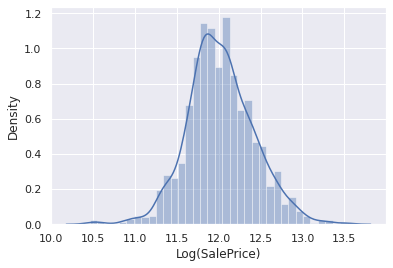

In [747]:
sns.distplot(np.log(data["SalePrice"]), axlabel = "Log(SalePrice)");

In [748]:
data["SalePrice_log"] = np.log(data["SalePrice"])

In [749]:
# Function to create barplots that indicate percentage for each category.

def perc_on_bar(plot, feature):
    '''
    plot
    feature: categorical feature
    the function won't work if a column is passed in hue parameter
    '''

    total = len(feature) # length of the column
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total) # percentage of each class of the category
        x = p.get_x() + p.get_width() / 2 - 0.05 # width of the plot
        y = p.get_y() + p.get_height()           # height of the plot
        ax.annotate(percentage, (x, y), size = 12) # annotate the percentage 
        
    plt.show() # show the plot

/usr/local/lib/python3.9/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


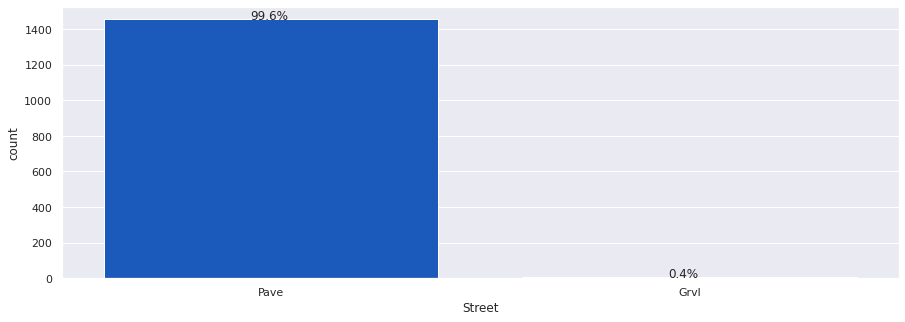

In [750]:
#Build barplot for job
plt.figure(figsize=(15,5))
ax = sns.countplot(data["Street"],palette='winter')
perc_on_bar(ax,data["Street"])


/usr/local/lib/python3.9/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


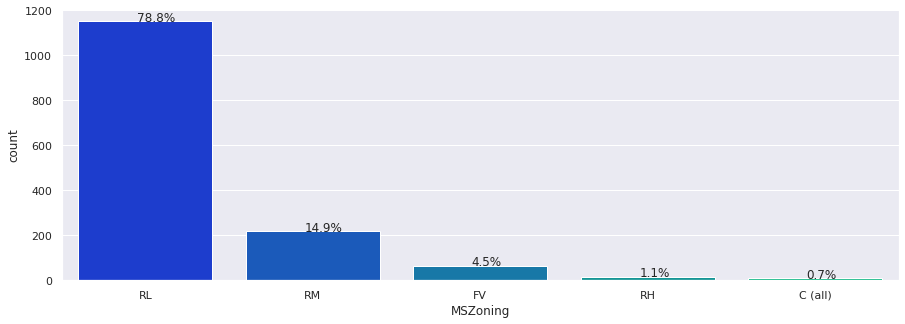

/usr/local/lib/python3.9/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


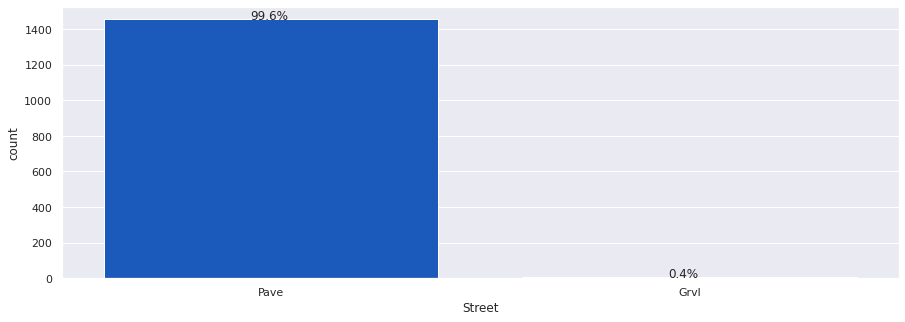

/usr/local/lib/python3.9/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


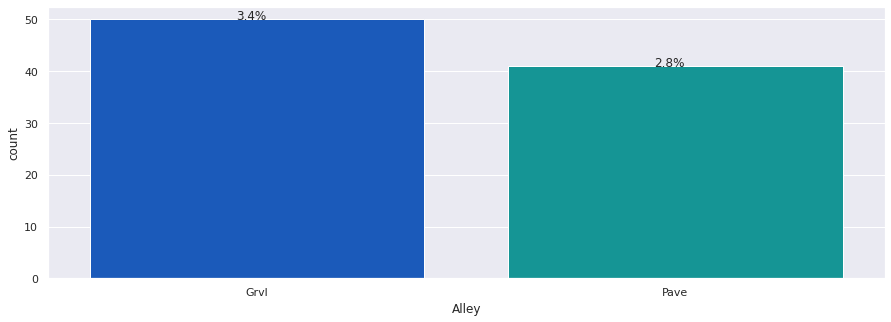

/usr/local/lib/python3.9/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


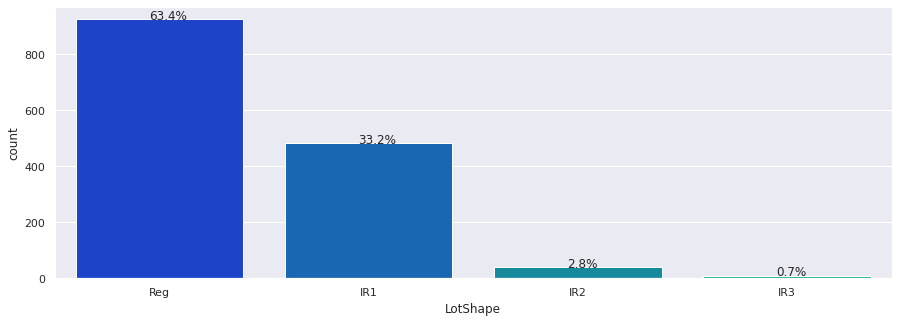

/usr/local/lib/python3.9/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


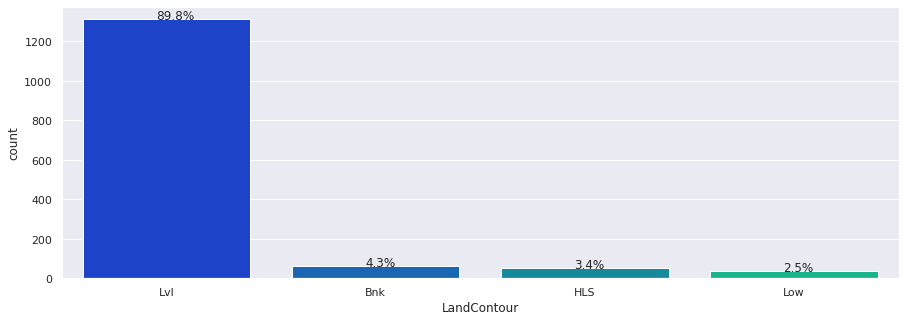

/usr/local/lib/python3.9/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


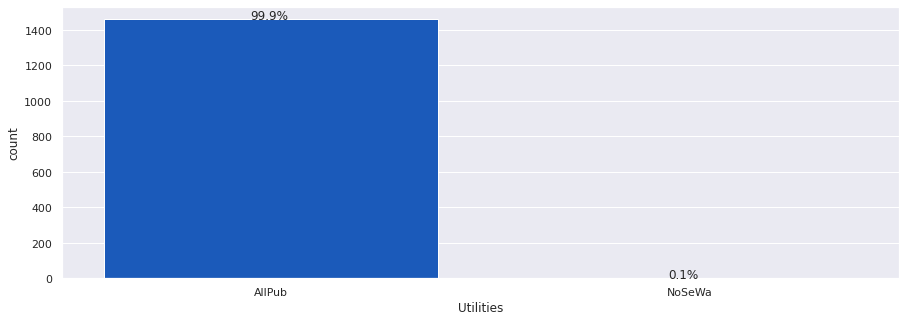

/usr/local/lib/python3.9/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


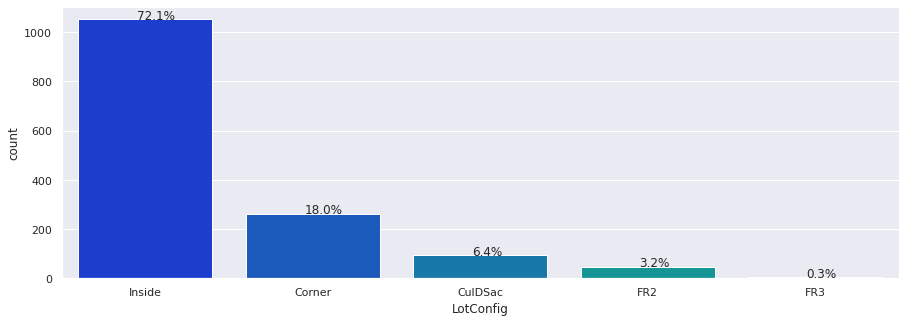

/usr/local/lib/python3.9/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


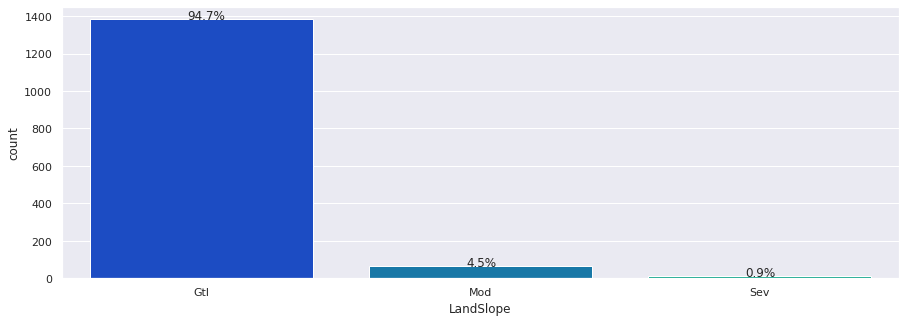

/usr/local/lib/python3.9/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


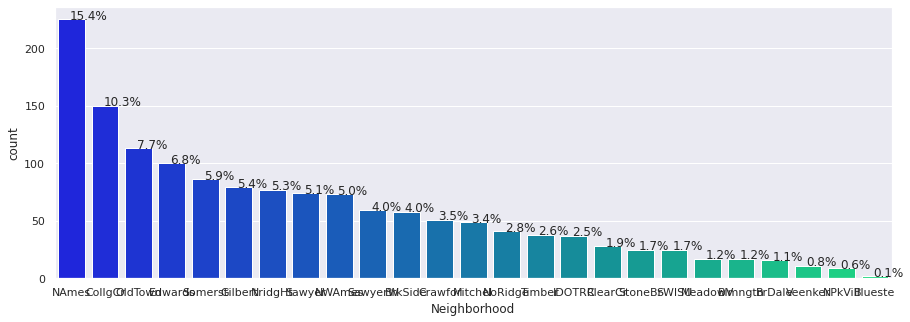

/usr/local/lib/python3.9/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


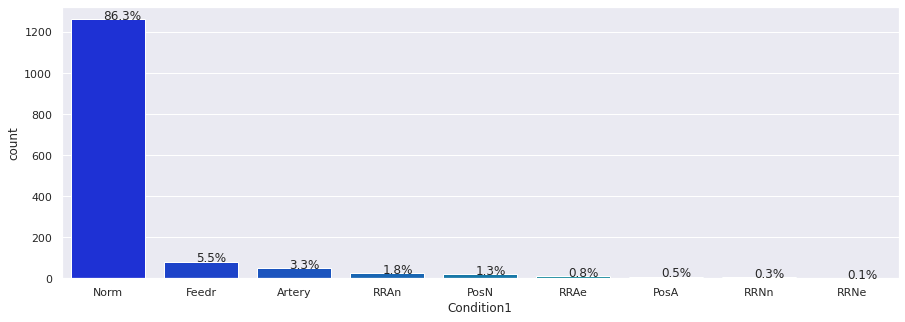

/usr/local/lib/python3.9/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


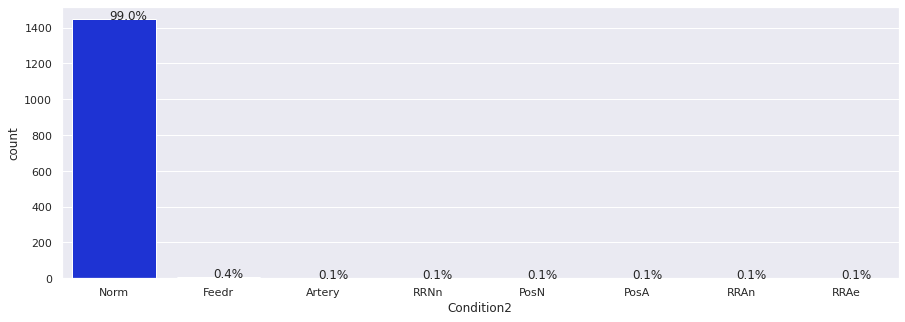

/usr/local/lib/python3.9/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


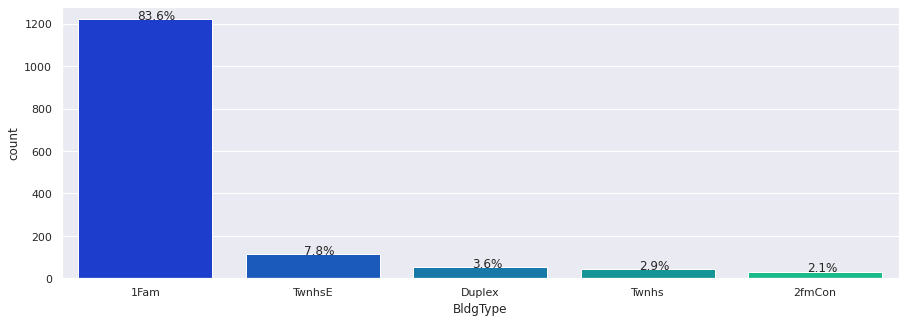

/usr/local/lib/python3.9/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


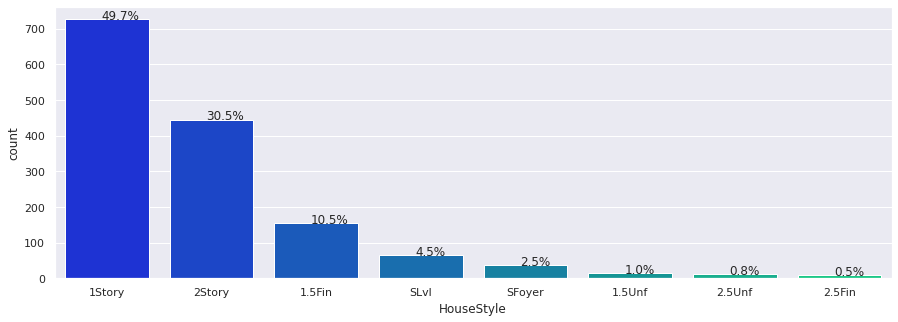

/usr/local/lib/python3.9/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


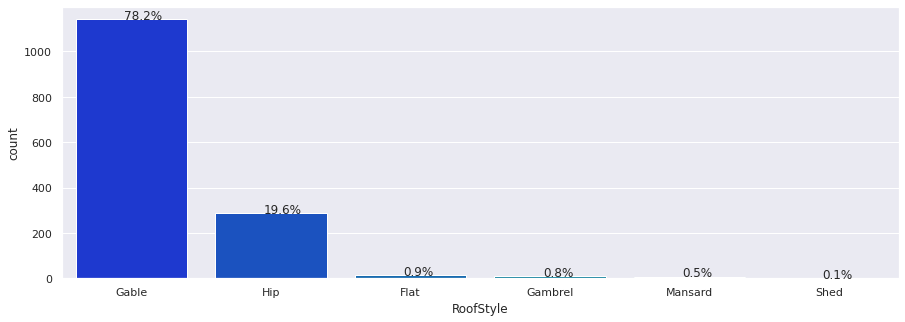

/usr/local/lib/python3.9/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


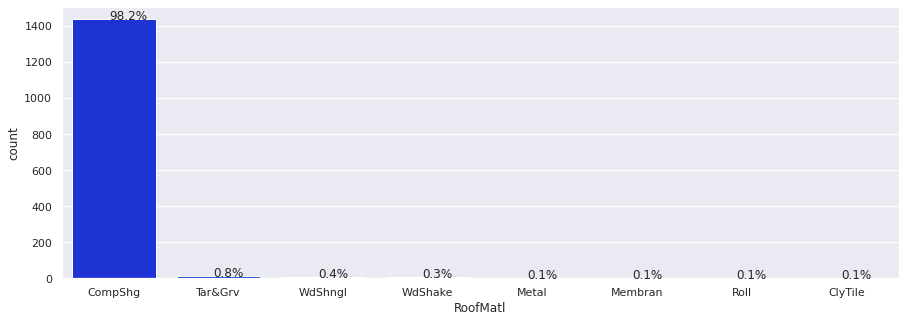

/usr/local/lib/python3.9/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


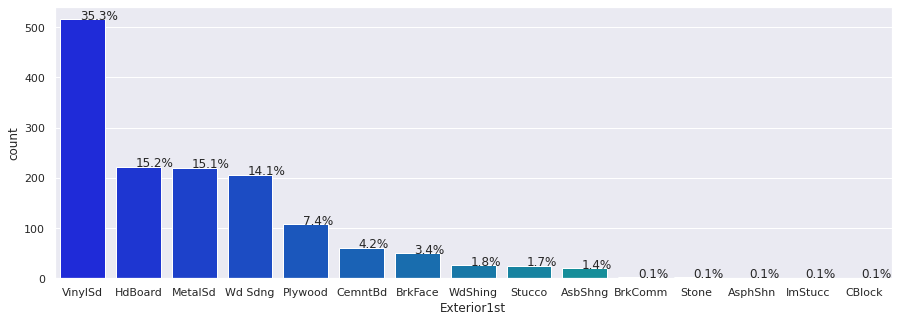

/usr/local/lib/python3.9/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


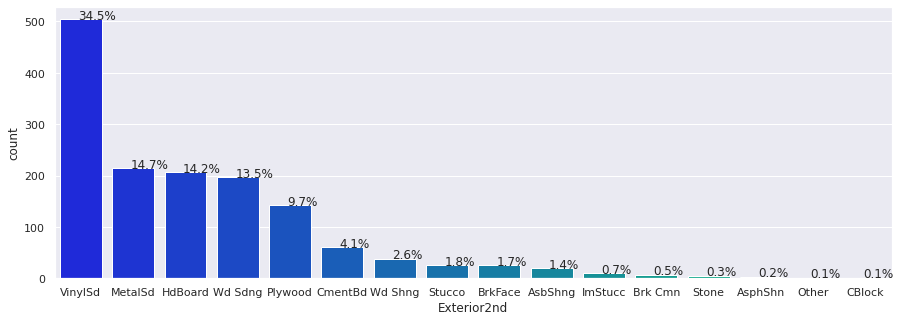

/usr/local/lib/python3.9/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


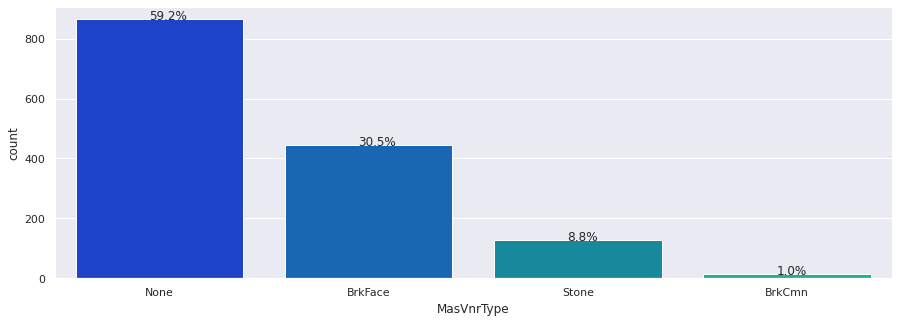

/usr/local/lib/python3.9/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


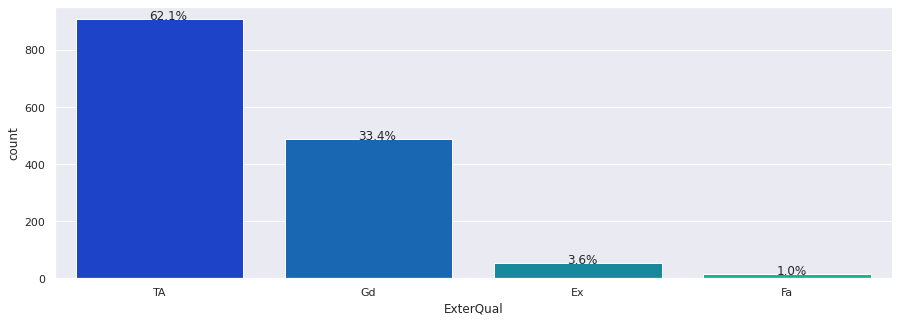

/usr/local/lib/python3.9/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


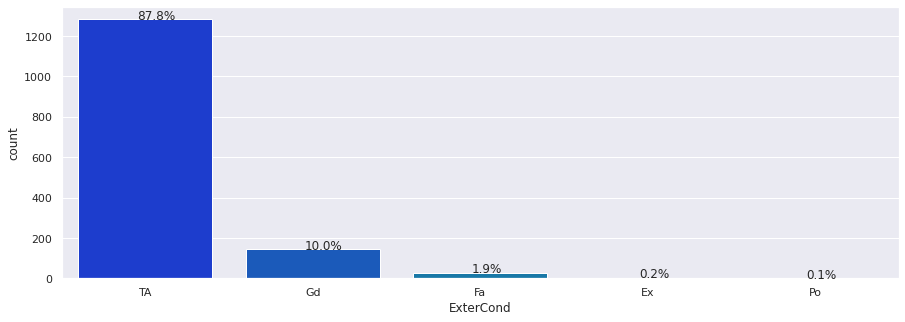

/usr/local/lib/python3.9/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


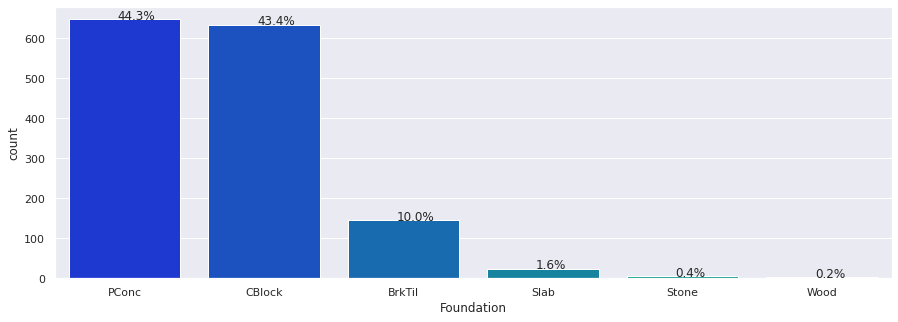

/usr/local/lib/python3.9/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


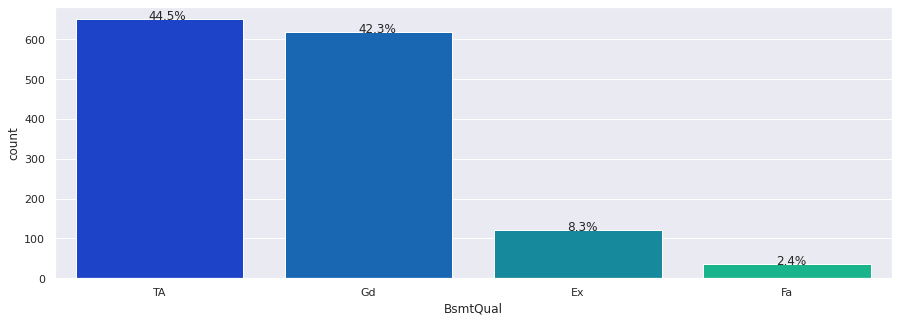

/usr/local/lib/python3.9/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


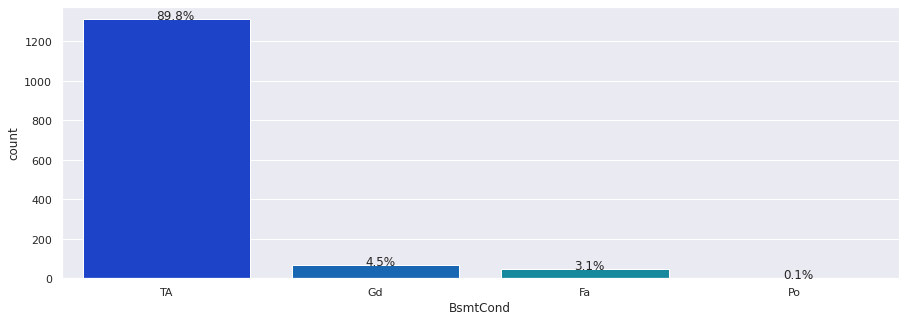

/usr/local/lib/python3.9/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


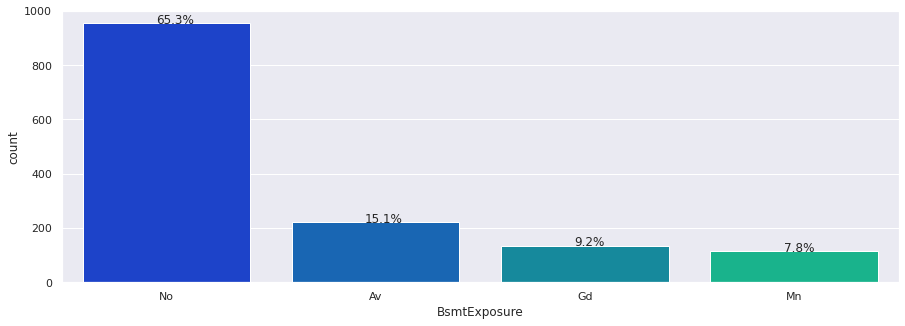

/usr/local/lib/python3.9/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


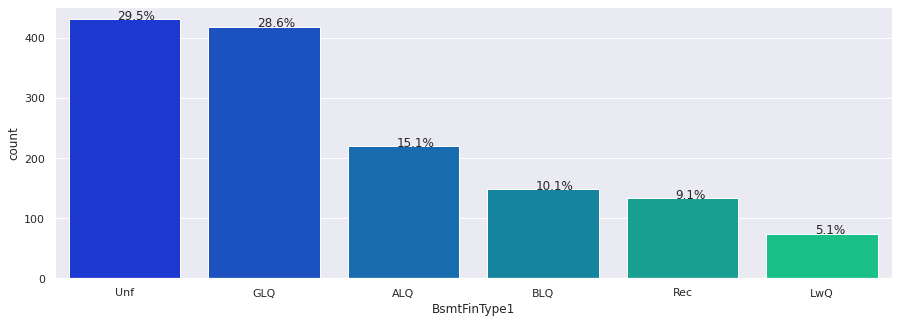

/usr/local/lib/python3.9/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


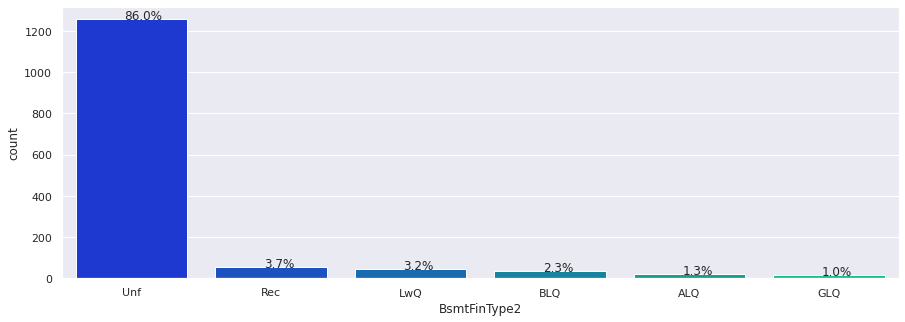

/usr/local/lib/python3.9/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


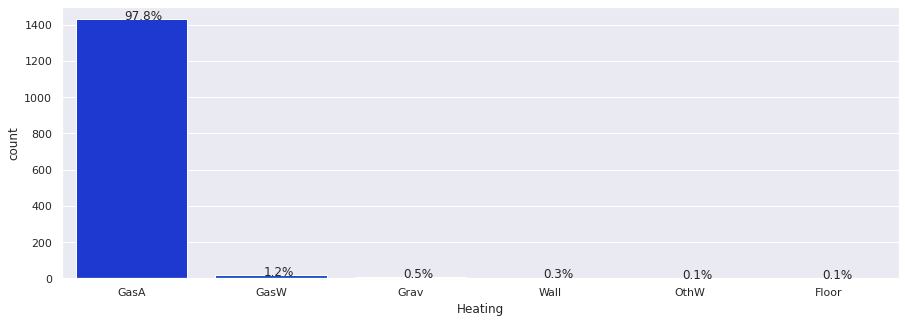

/usr/local/lib/python3.9/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


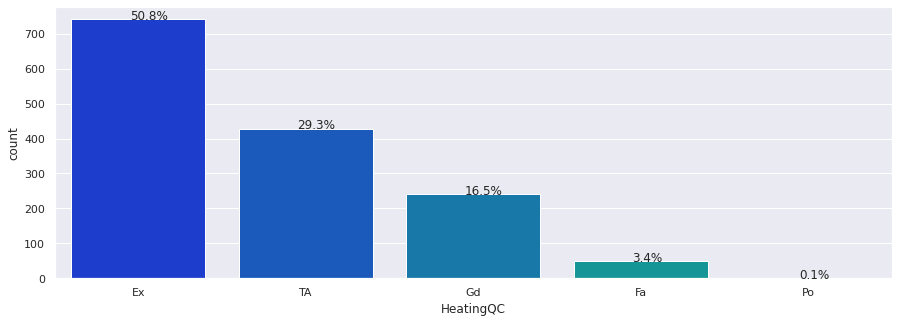

/usr/local/lib/python3.9/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


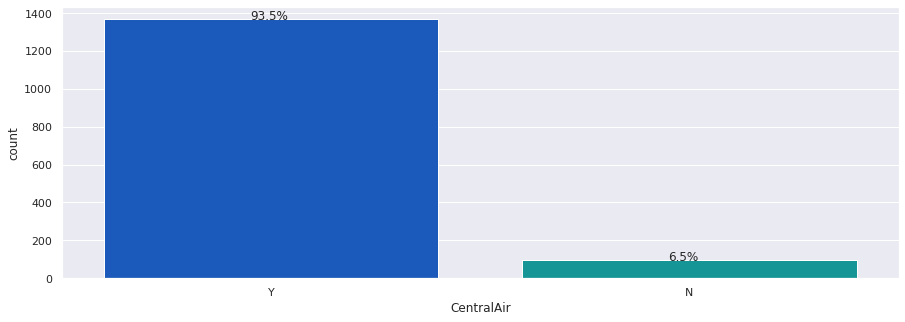

/usr/local/lib/python3.9/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


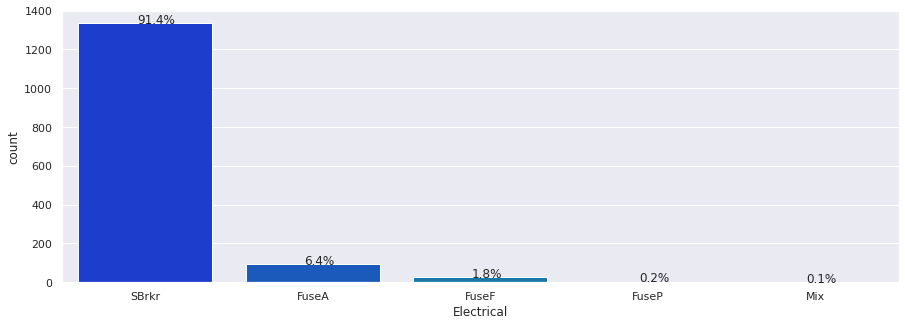

/usr/local/lib/python3.9/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


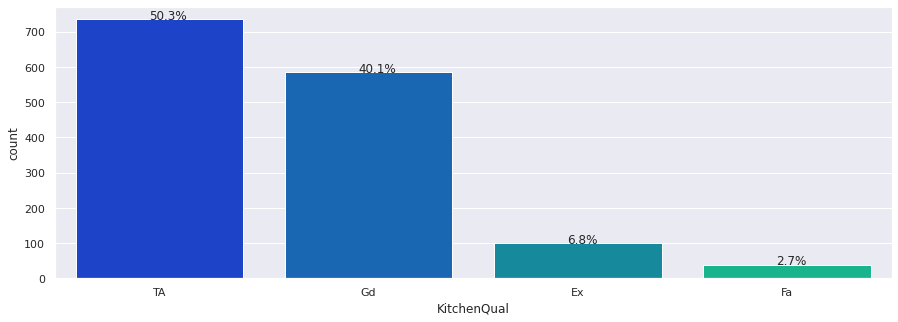

/usr/local/lib/python3.9/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


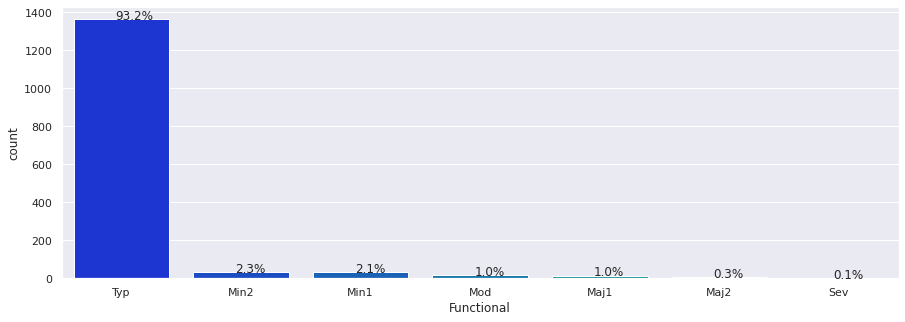

/usr/local/lib/python3.9/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


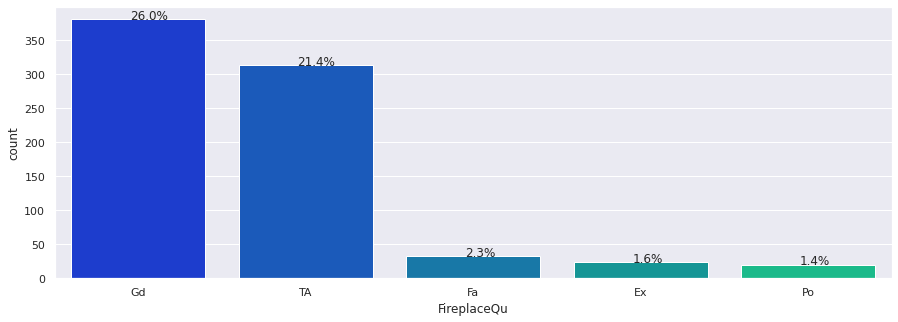

/usr/local/lib/python3.9/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


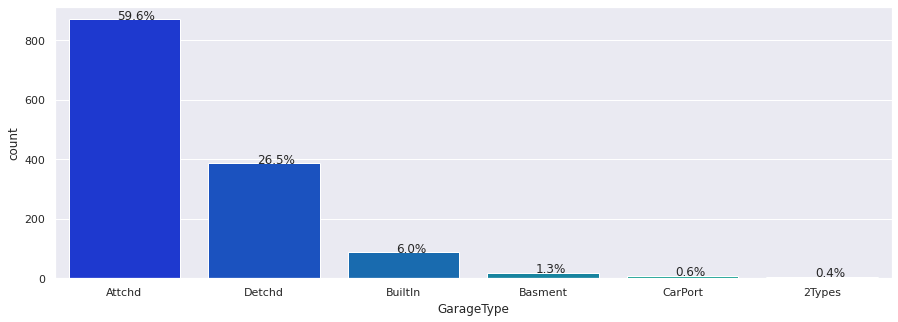

/usr/local/lib/python3.9/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


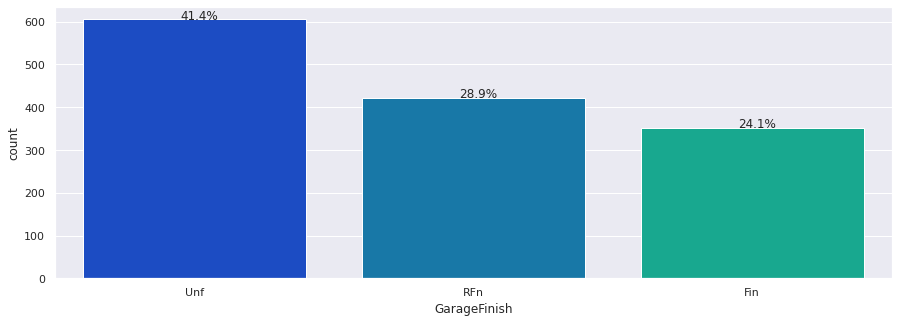

/usr/local/lib/python3.9/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


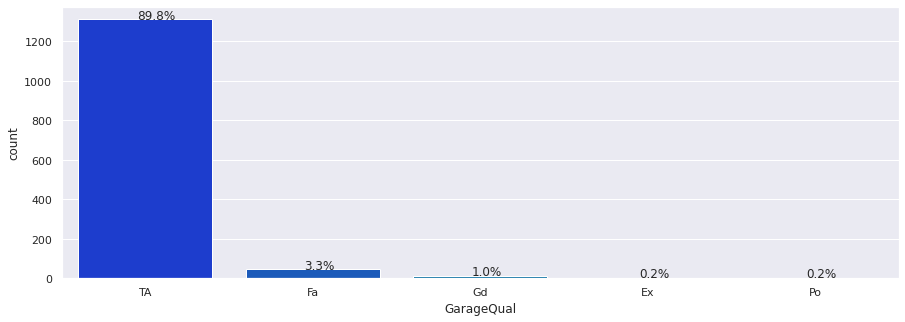

/usr/local/lib/python3.9/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


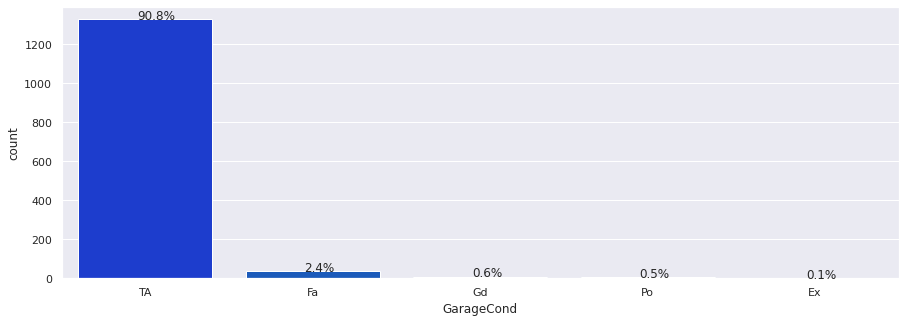

/usr/local/lib/python3.9/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


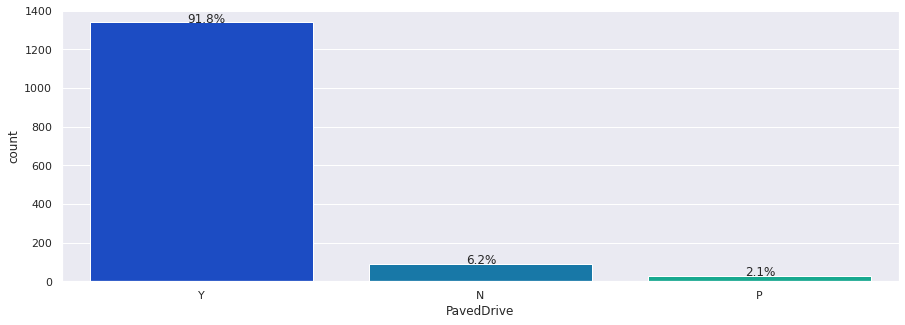

/usr/local/lib/python3.9/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


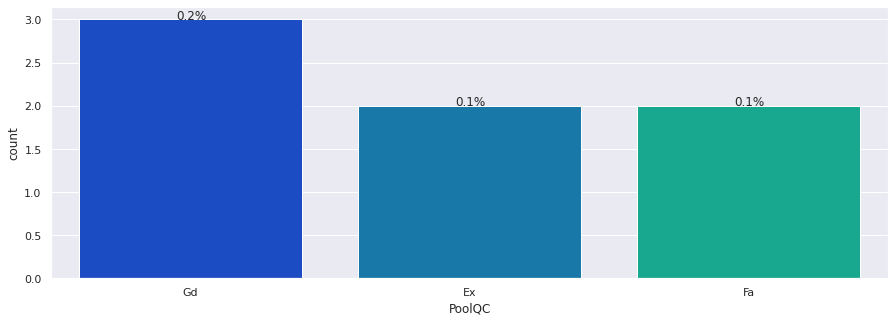

/usr/local/lib/python3.9/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


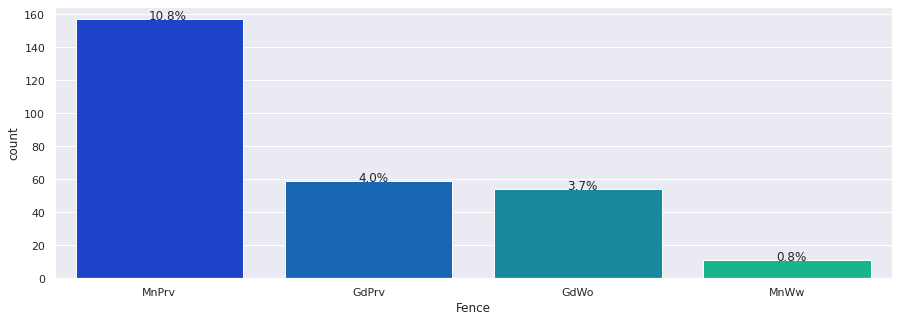

/usr/local/lib/python3.9/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


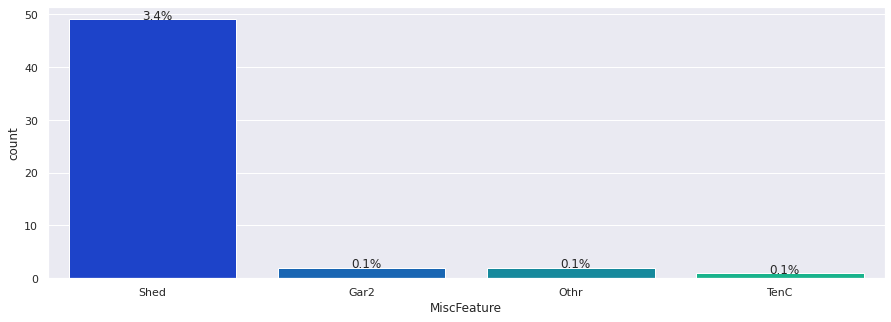

/usr/local/lib/python3.9/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


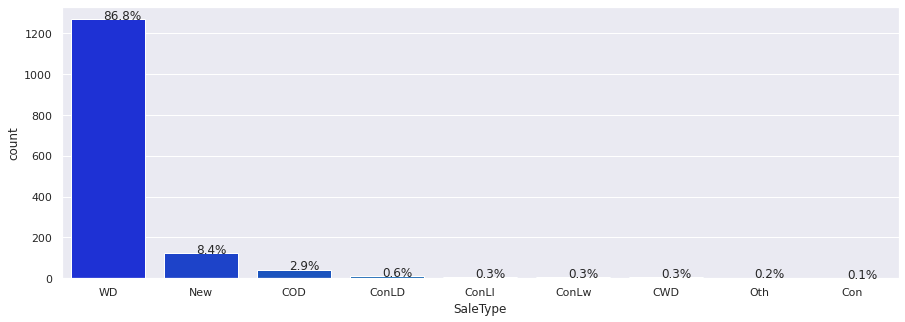

/usr/local/lib/python3.9/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


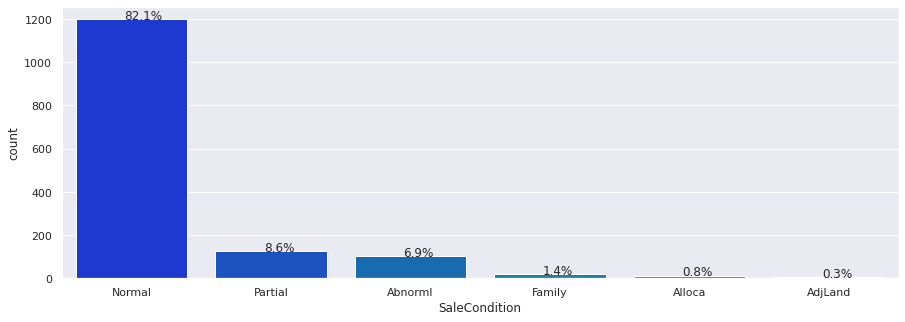

In [751]:
for i in cols_cat: 
  plt.figure(figsize=(15,5))
  ax = sns.countplot(data[i],palette='winter', order = data[i].value_counts().index)
  perc_on_bar(ax,data[i])

<AxesSubplot:xlabel='SalePrice_log'>

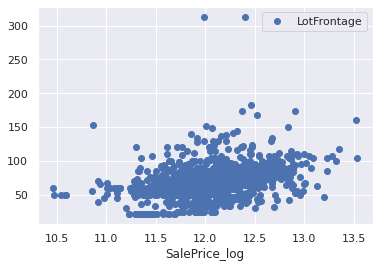

In [752]:
data.plot(x = 'SalePrice_log', y = 'LotFrontage', style = 'o')

<AxesSubplot:xlabel='GarageYrBlt_log'>

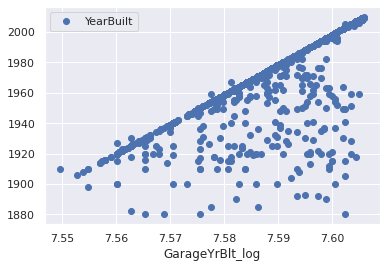

In [753]:
data.plot(x = 'GarageYrBlt_log', y = 'YearBuilt', style = 'o')

<AxesSubplot:xlabel='GrLivArea_log'>

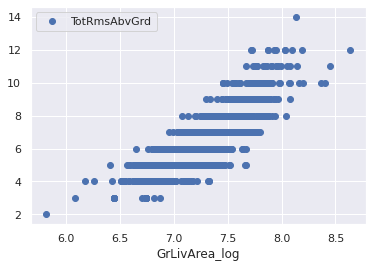

In [754]:
data.plot(x = 'GrLivArea_log', y = 'TotRmsAbvGrd', style = 'o')

<AxesSubplot:xlabel='SalePrice_log'>

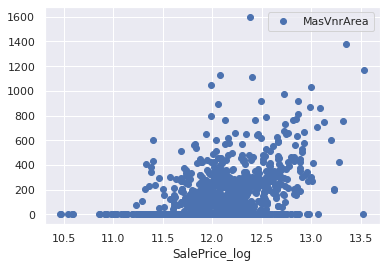

In [755]:
data.plot(x = 'SalePrice_log', y = 'MasVnrArea', style = 'o')

<AxesSubplot:xlabel='SalePrice_log'>

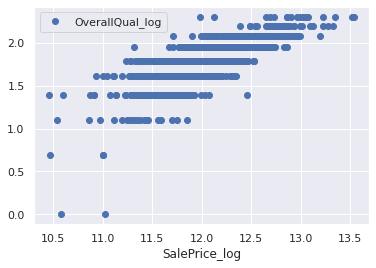

In [756]:
data.plot(x = 'SalePrice_log', y = 'OverallQual_log', style = 'o')


<AxesSubplot:xlabel='1stFlrSF_log'>

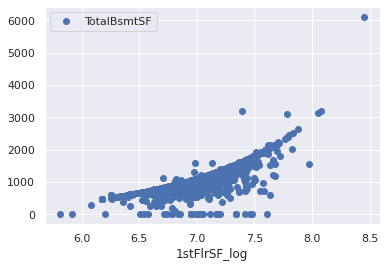

In [757]:
data.plot(x = '1stFlrSF_log', y = 'TotalBsmtSF', style = 'o')

### **Heat map**

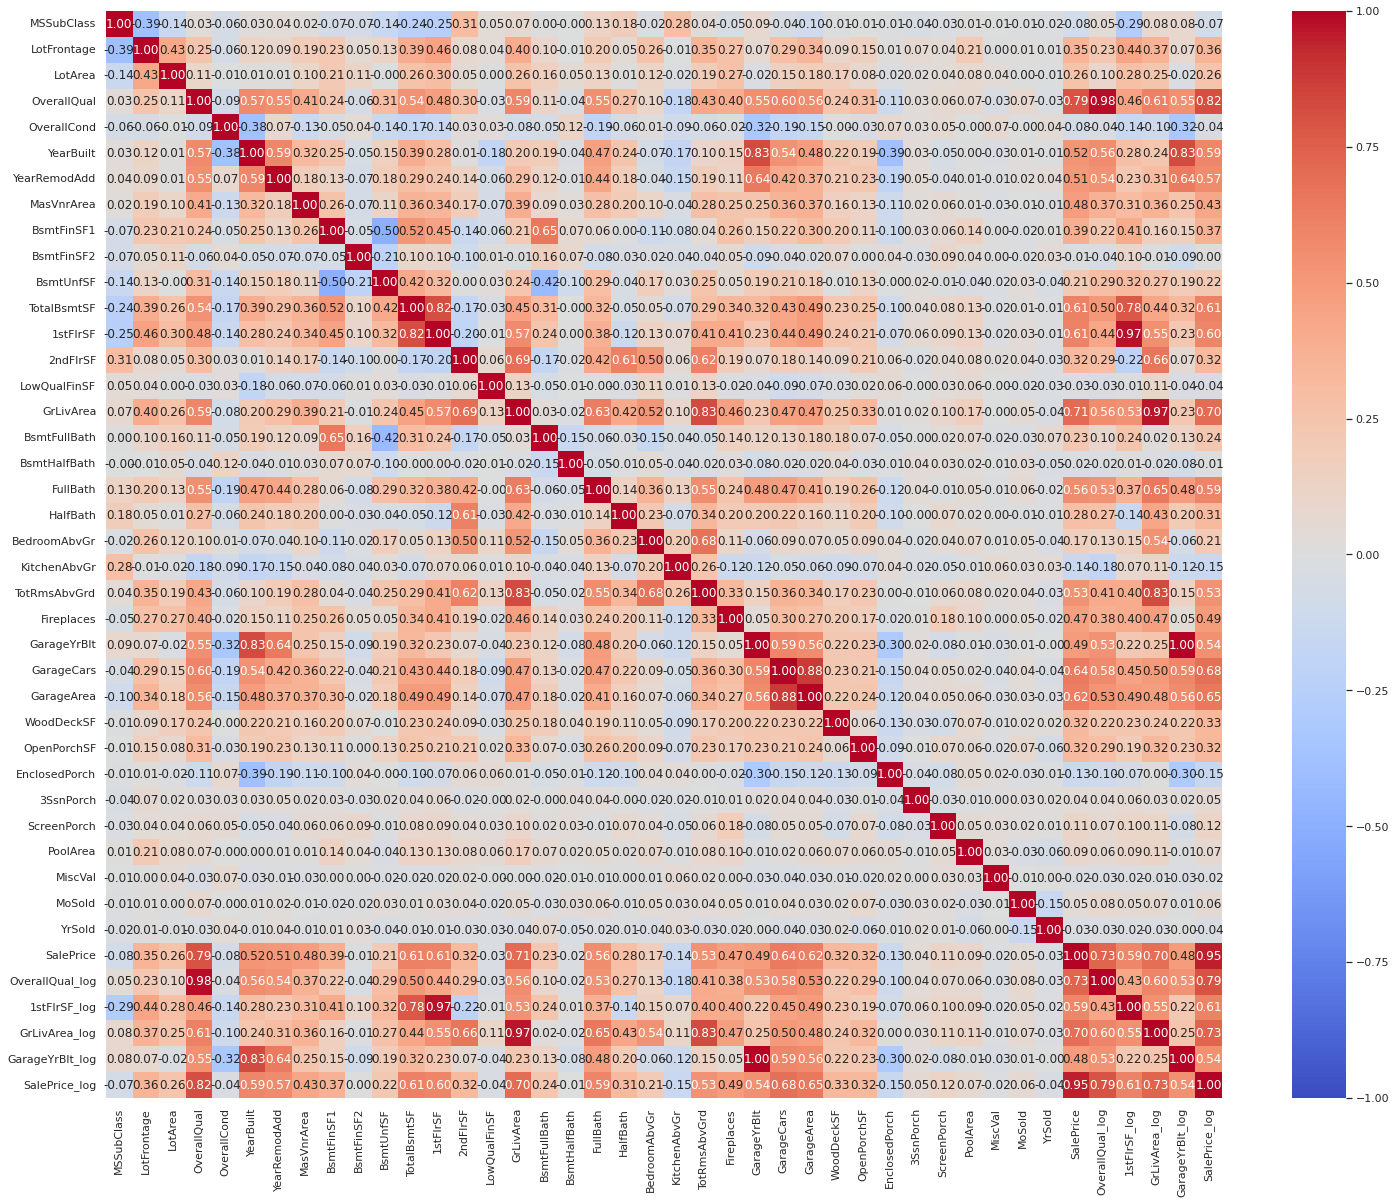

In [758]:
# Separating numerical variables
numerical_col = data.select_dtypes(include=np.number).columns.tolist()

# Build correlation matrix for numerical columns

corr = data[numerical_col].corr()
# plot the heatmap

plt.figure(figsize=(25,20))
sns.heatmap(corr,cmap='coolwarm',vmax=1,vmin=-1,
        fmt=".2f",
        xticklabels=corr.columns,
        yticklabels=corr.columns,
        annot = True);

/usr/local/lib/python3.9/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='SalePrice_log', ylabel='MasVnrType'>

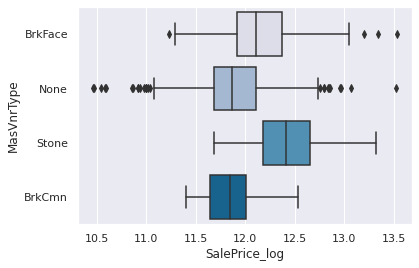

In [759]:
sns.boxplot(data["SalePrice_log"],data['MasVnrType'],palette="PuBu")

/usr/local/lib/python3.9/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='SalePrice_log', ylabel='SaleType'>

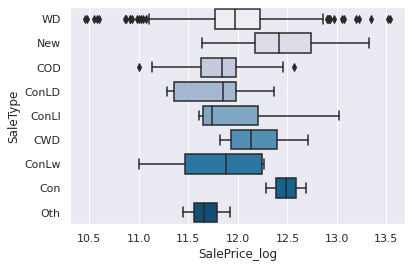

In [760]:
sns.boxplot(data["SalePrice_log"],data['SaleType'],palette="PuBu")

/usr/local/lib/python3.9/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='SalePrice_log', ylabel='SaleCondition'>

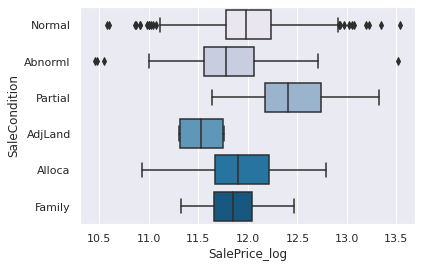

In [761]:
sns.boxplot(data["SalePrice_log"],data['SaleCondition'],palette="PuBu")

In [762]:
cols = data.select_dtypes(['int64']).columns.tolist()

In [763]:
cols

['MSSubClass',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold',
 'SalePrice']

### **Feature Engineering**

### **Missing value treatment**

In [764]:
data.isnull().sum()[data.isnull().sum()>=1].sort_values(ascending=False)

PoolQC             1453
MiscFeature        1406
Alley              1369
Fence              1179
FireplaceQu         690
LotFrontage         259
GarageType           81
GarageYrBlt          81
GarageFinish         81
GarageQual           81
GarageCond           81
GarageYrBlt_log      81
BsmtExposure         38
BsmtFinType2         38
BsmtFinType1         37
BsmtCond             37
BsmtQual             37
MasVnrArea            8
MasVnrType            8
Electrical            1
dtype: int64

In [765]:
data.shape

(1460, 85)

<AxesSubplot:>

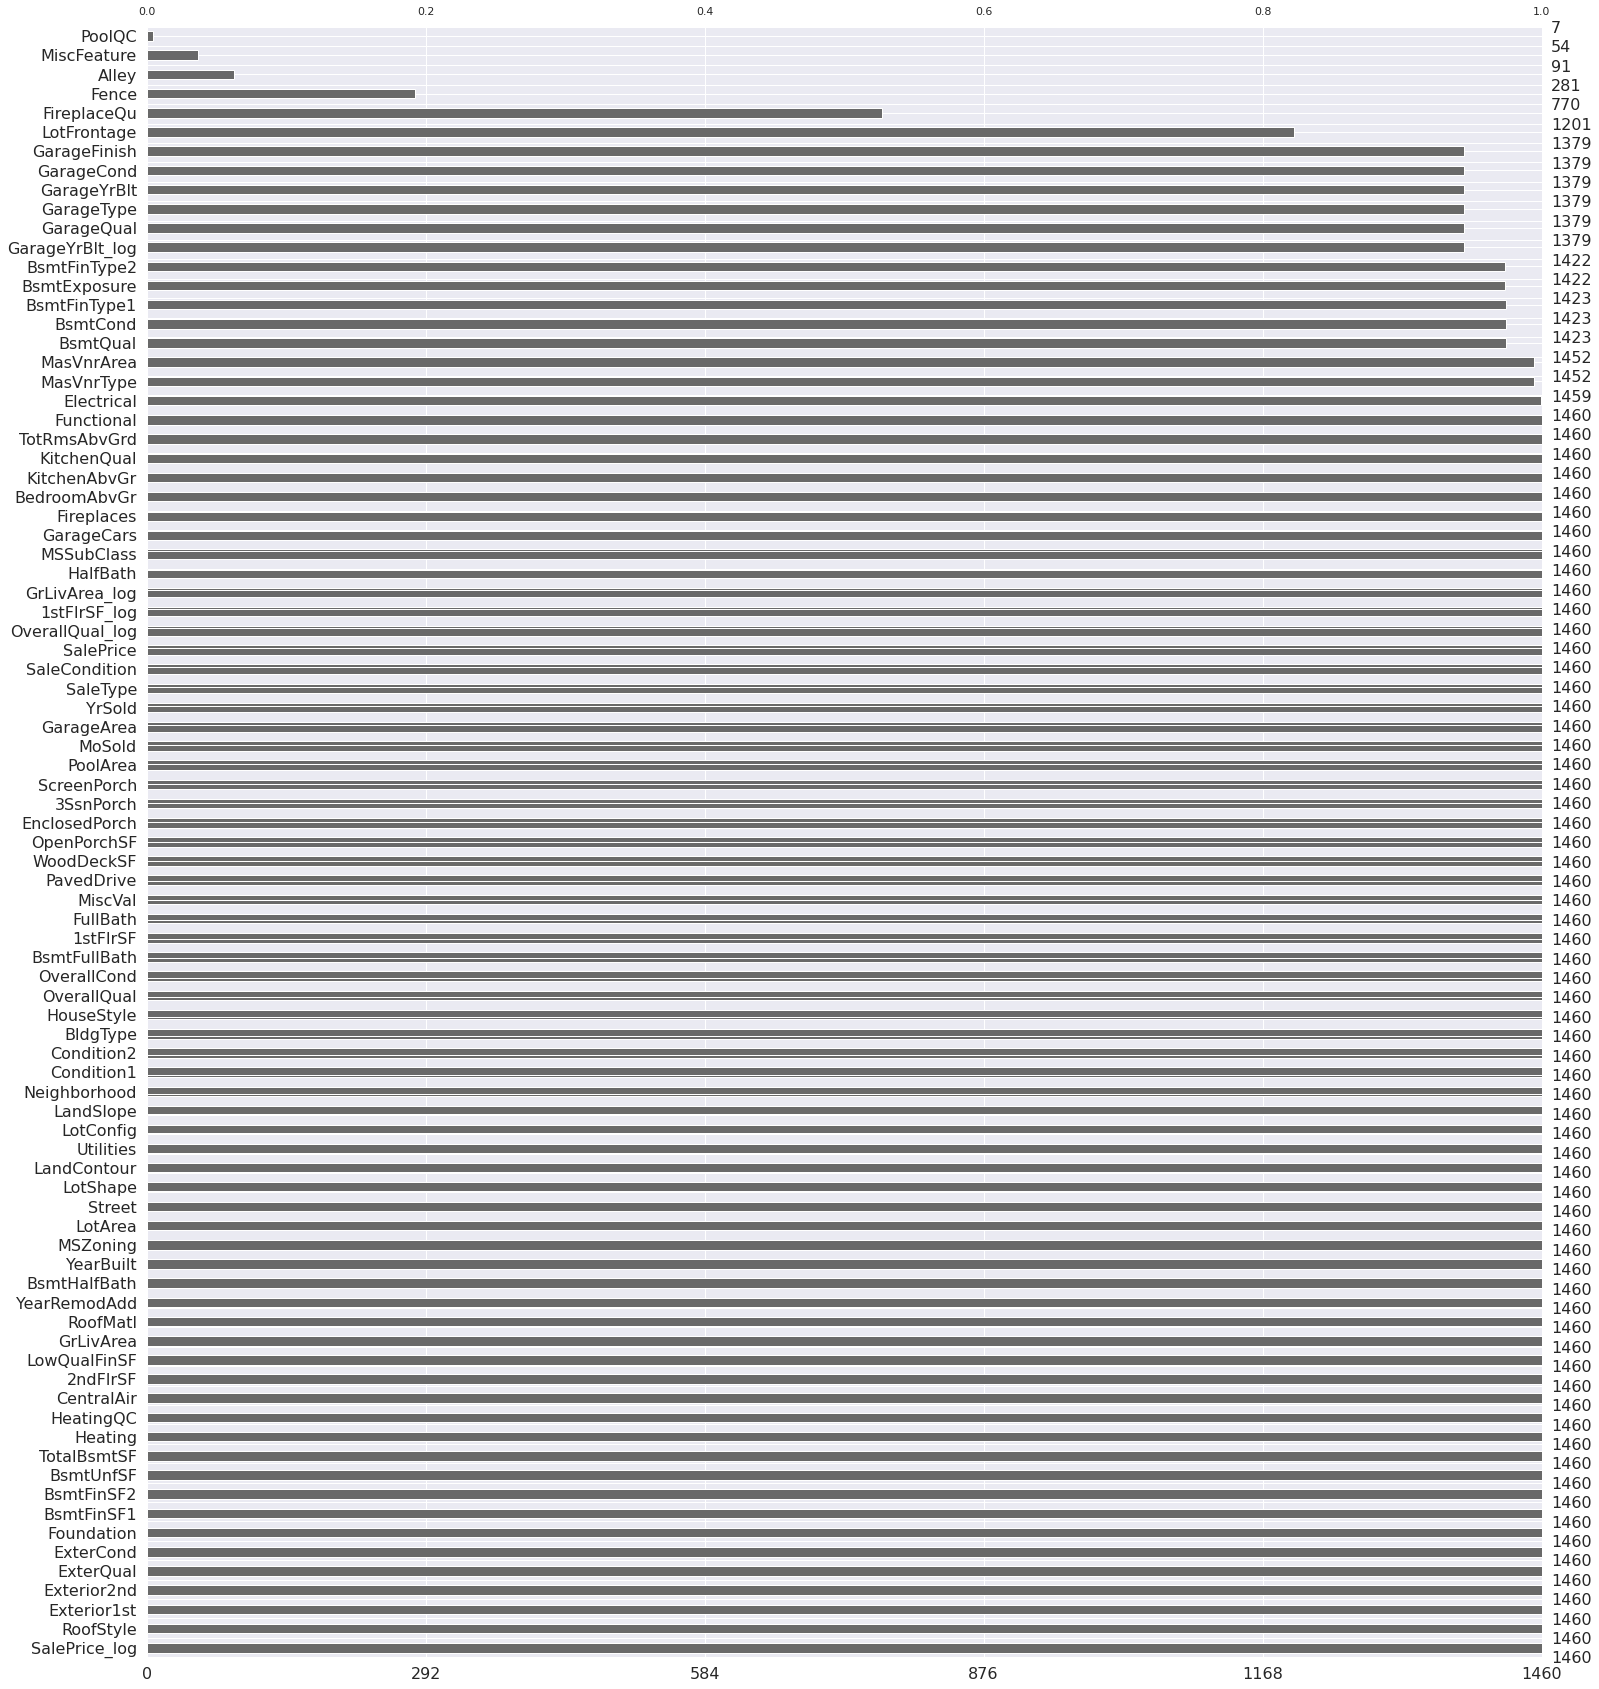

In [766]:
import missingno
missingno.bar(data, sort = 'descending')

In [767]:
data.drop(columns=["Alley", 'FireplaceQu', 'PoolQC', 'MiscFeature', 'Fence'], inplace = True, axis = 1)
data.shape

(1460, 80)

In [768]:
data.replace(["NA"], np.NaN, inplace = True)

<AxesSubplot:>

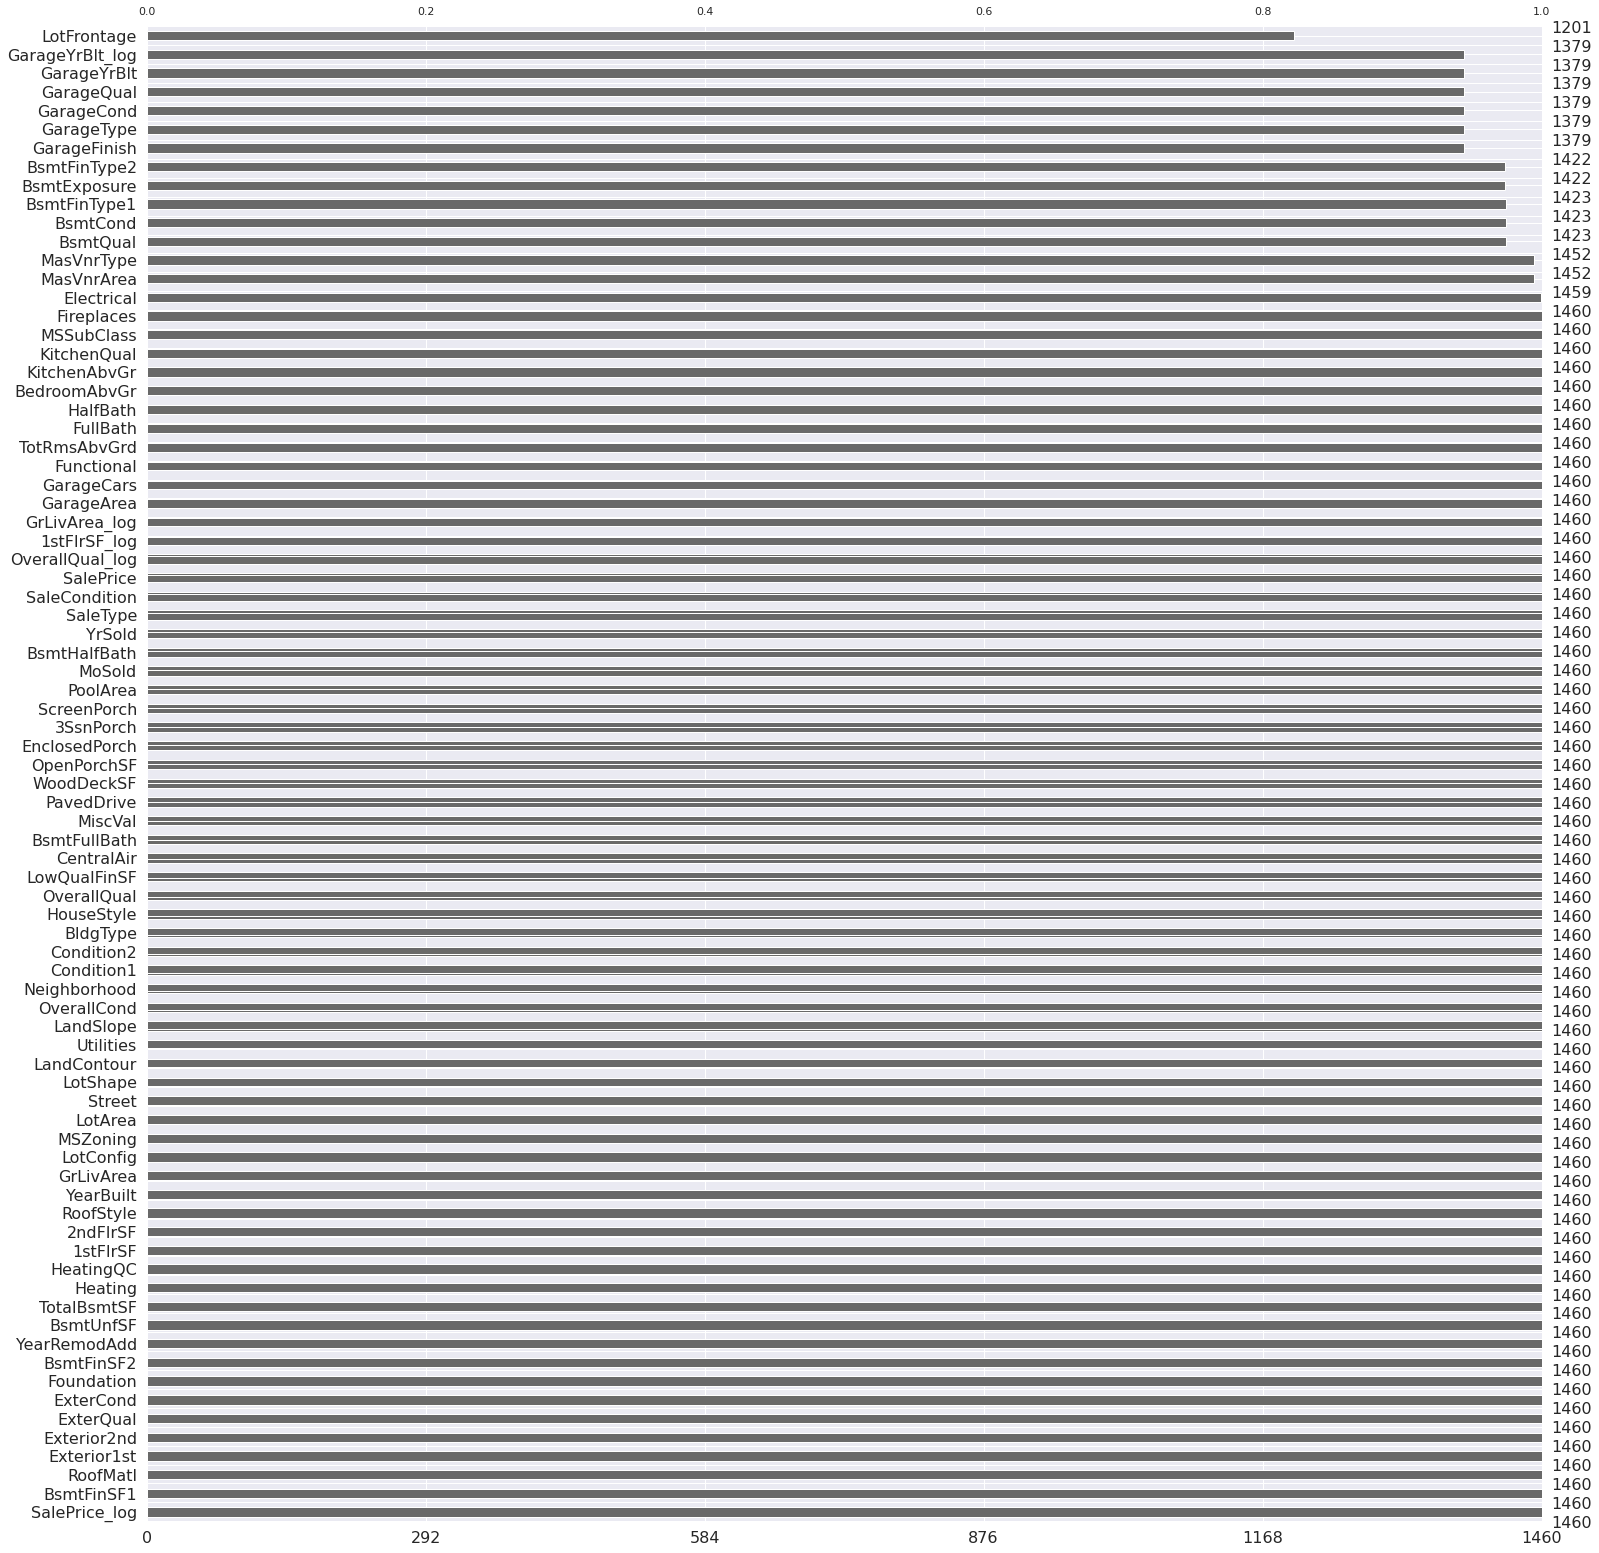

In [769]:
import missingno
missingno.bar(data, sort = 'descending')

In [770]:
data['LotFrontage'] = data['LotFrontage'].fillna(data.groupby(['OverallQual_log'])['LotFrontage'].transform('median'))

In [771]:
data['MasVnrArea'] = data['MasVnrArea'].fillna(data.groupby(['OverallQual'])['MasVnrArea'].transform('median'))

In [772]:
data['GarageYrBlt_log'] = data['GarageYrBlt_log'].fillna(data.groupby(['YearBuilt'])['GarageYrBlt_log'].transform('median'))

In [773]:
data.isnull().sum()[data.isnull().sum()>=1].sort_values(ascending=False)

GarageType         81
GarageYrBlt        81
GarageFinish       81
GarageQual         81
GarageCond         81
BsmtExposure       38
BsmtFinType2       38
BsmtQual           37
BsmtCond           37
BsmtFinType1       37
MasVnrType          8
GarageYrBlt_log     3
Electrical          1
dtype: int64

In [774]:
# Checking missing values in the column 'Seats'
print(data[data['GarageYrBlt_log'].isnull()])

      MSSubClass MSZoning  LotFrontage  LotArea Street LotShape LandContour  \
1137          50       RL         54.0     6342   Pave      Reg         Lvl   
1234          70       RH         55.0     8525   Pave      Reg         Bnk   
1349          70       RM         50.0     5250   Pave      Reg         Lvl   

     Utilities LotConfig LandSlope  ... MoSold YrSold SaleType SaleCondition  \
1137    AllPub    Inside       Gtl  ...      5   2010       WD        Normal   
1234    AllPub    Inside       Gtl  ...     11   2008       WD       Abnorml   
1349    AllPub    Inside       Gtl  ...     12   2008       WD        Normal   

     SalePrice  OverallQual_log  1stFlrSF_log  GrLivArea_log  GarageYrBlt_log  \
1137     94000         1.609438      6.659294       6.927558              NaN   
1234    130000         1.609438      6.931472       7.582738              NaN   
1349    122000         2.079442      6.843750       7.765569              NaN   

     SalePrice_log  
1137     11.4510

In [775]:
data['GarageYrBlt_log'] = data['GarageYrBlt_log'].fillna(data.groupby(['SalePrice_log'])['GarageYrBlt_log'].transform('median'))

In [776]:
data['Electrical'].isnull().sum()

1

In [777]:
def imputing_str(x):
    le = LabelEncoder()
    for i in x.columns:        
        if x[i].dtype==float:
            x[i].fillna(x.groupby(['OverallQual_log'])[i].transform('median'))
        else:
            x[i].fillna(x[i].mode(), inplace = True)
            x[i] = le.fit_transform(x[i])
    return x.info()

In [778]:
imputing_str(data)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 80 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   MSSubClass       1460 non-null   int64  
 1   MSZoning         1460 non-null   int64  
 2   LotFrontage      1460 non-null   float64
 3   LotArea          1460 non-null   int64  
 4   Street           1460 non-null   int64  
 5   LotShape         1460 non-null   int64  
 6   LandContour      1460 non-null   int64  
 7   Utilities        1460 non-null   int64  
 8   LotConfig        1460 non-null   int64  
 9   LandSlope        1460 non-null   int64  
 10  Neighborhood     1460 non-null   int64  
 11  Condition1       1460 non-null   int64  
 12  Condition2       1460 non-null   int64  
 13  BldgType         1460 non-null   int64  
 14  HouseStyle       1460 non-null   int64  
 15  OverallQual      1460 non-null   int64  
 16  OverallCond      1460 non-null   int64  
 17  YearBuilt     

In [779]:
data.isnull().sum()[data.isnull().sum()>=1].sort_values(ascending=False)

GarageYrBlt        81
GarageYrBlt_log     1
dtype: int64

In [780]:
print(data[data['GarageYrBlt_log'].isnull()])

      MSSubClass  MSZoning  LotFrontage  LotArea  Street  LotShape  \
1137           4         3         54.0      151       1         3   

      LandContour  Utilities  LotConfig  LandSlope  ...  MoSold  YrSold  \
1137            3          0          4          0  ...       4       4   

      SaleType  SaleCondition  SalePrice  OverallQual_log  1stFlrSF_log  \
1137         8              4         57         1.609438      6.659294   

      GrLivArea_log  GarageYrBlt_log  SalePrice_log  
1137       6.927558              NaN       11.45105  

[1 rows x 80 columns]


In [781]:
data.drop(index = 1137, inplace=True)

In [782]:
data.shape

(1459, 80)

**Treating Outliers**

In [783]:
def treat_outliers(df,col):
    '''
    treats outliers in a varaible
    col: str, name of the numerical varaible
    df: data frame
    col: name of the column
    '''
    
    Q1= df[col].quantile(0.25) # 25th quantile
    Q3= df[col].quantile(0.75)  # 75th quantile
    IQR= Q3-Q1   # IQR Range
    Lower_Whisker = Q1-1.5*IQR  #define lower whisker
    Upper_Whisker = Q3+1.5*IQR  # define upper Whisker
    df[col] = np.clip(df[col], Lower_Whisker, Upper_Whisker) # all the values samller than Lower_Whisker will be assigned value of Lower_whisker 
                                                            # and all the values above upper_whishker will be assigned value of upper_Whisker 
    return df

def treat_outliers_all(df, col_list):
    '''
    treat outlier in all numerical varaibles
    col_list: list of numerical varaibles
    df: data frame
    '''
    for c in col_list:
        df = treat_outliers(df,c)
        
    return df

In [784]:
data.isnull().sum()[data.isnull().sum()>=1].sort_values(ascending=False)

GarageYrBlt    80
dtype: int64

### **Split the Data**

In [785]:
X = data.drop(['SalePrice', 'SalePrice_log','OverallQual','1stFlrSF','GrLivArea','GarageYrBlt'], axis = 1)

y = data[['SalePrice_log', 'SalePrice']]

In [786]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, shuffle = True, random_state=42)

In [787]:
print("X_train: ",X_train.shape)
print("X_test: ",X_test.shape)
print("y_train: ",y_train.shape)
print("y_test: ",y_test.shape)

X_train:  (1167, 74)
X_test:  (292, 74)
y_train:  (1167, 2)
y_test:  (292, 2)


In [788]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()

X_train_std = ss.fit_transform(X_train)
X_test_std = ss.transform(X_test) 

In [790]:
# Create a linear regression model
lr = LinearRegression()

In [791]:
# Fit linear regression model
lr.fit(X_train, y_train["SalePrice_log"]) 

LinearRegression()

/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


Training done using Random Forest


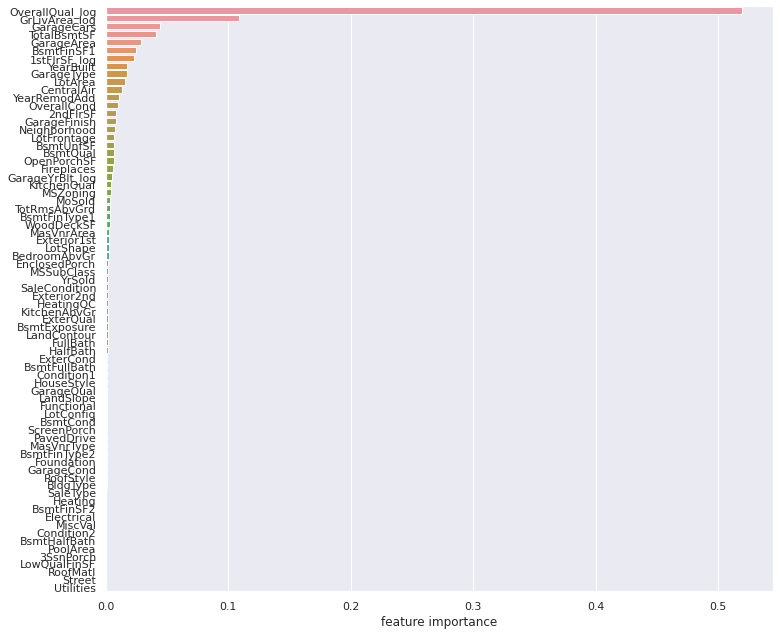

In [792]:
# feature importance using random forest
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=80, max_features='auto')
rf.fit(X_train, y_train["SalePrice_log"])
print('Training done using Random Forest')

ranking = np.argsort(-rf.feature_importances_)
f, ax = plt.subplots(figsize=(11, 9))
sns.barplot(x=rf.feature_importances_[ranking], y=X_train.columns.values[ranking], orient='h')
ax.set_xlabel("feature importance")
plt.tight_layout()
plt.show()

###**Improve the strength of Important Feature**  

In [793]:

# use the top 30 features only
X_train = X_train.iloc[:,ranking[:30]]
X_test = X_test.iloc[:,ranking[:30]]
# interaction between the top 2
X_train["2_imp_feature"] = X_train["GrLivArea_log"]*X_train["OverallQual_log"]
X_test["2_imp_feature"] = X_test["GrLivArea_log"]*X_test["OverallQual_log"]

<ipython-input-793-29bfc59b4e5a>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train["2_imp_feature"] = X_train["GrLivArea_log"]*X_train["OverallQual_log"]
<ipython-input-793-29bfc59b4e5a>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test["2_imp_feature"] = X_test["GrLivArea_log"]*X_test["OverallQual_log"]


In [794]:
print("X_train: ",X_train.shape)
print("X_test: ",X_test.shape)
print("y_train: ",y_train.shape)
print("y_test: ",y_test.shape)

X_train:  (1167, 31)
X_test:  (292, 31)
y_train:  (1167, 2)
y_test:  (292, 2)


In [795]:
# XGBoost
import xgboost as xgb
from sklearn.model_selection import GridSearchCV

print("Parameter optimization")
xgboost = xgb.XGBRegressor()
reg_xgb = GridSearchCV(xgboost,
                   {'max_depth': [2,4,6],
                    'n_estimators': [50,100,200]}, verbose=1)
reg_xgb.fit(X_train, y_train["SalePrice_log"])

Parameter optimization
Fitting 5 folds for each of 9 candidates, totalling 45 fits


GridSearchCV(estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None, gpu_id=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, max_bin=None,
                                    max_cat_threshold=None,
                                    max_cat_to_onehot=None, max_delta_step=None,
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None, n_estimators=100,
                                    n_jobs=None, num_parallel_tree=None,
                                    predictor=None, random_state=None, ...),
             param_grid={'max_depth': [2, 4, 6],
                         'n_estimators': [50, 100, 200]},
             verbose=1)

In [796]:
# SVR
from sklearn.svm import SVR

reg_svr = GridSearchCV(SVR(kernel='rbf', gamma=0.1), cv=5,
                   param_grid={"C": [1e0, 1e1, 1e2, 1e3],
                               "gamma": np.logspace(-2, 2, 5)})
reg_svr.fit(X_train, y_train["SalePrice_log"])

GridSearchCV(cv=5, estimator=SVR(gamma=0.1),
             param_grid={'C': [1.0, 10.0, 100.0, 1000.0],
                         'gamma': array([1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02])})

In [797]:
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasRegressor

def create_model(optimizer='adam'):
    model = Sequential()
    model.add(Dense(X_train.shape[1], input_dim=X_train.shape[1], kernel_initializer='normal', activation='relu'))
    model.add(Dense(16, kernel_initializer='normal', activation='relu'))
    model.add(Dense(1, kernel_initializer='normal'))

    model.compile(loss='mean_squared_error', optimizer=optimizer)
    return model

model = KerasRegressor(build_fn=create_model, verbose=0)
# define the grid search parameters
optimizer = ['SGD','Adam']
batch_size = [10, 30, 50]
epochs = [10, 50, 100]
param_grid = dict(optimizer=optimizer, batch_size=batch_size, epochs=epochs)
reg_dl = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1)
reg_dl.fit(X_train, y_train["SalePrice_log"])


<ipython-input-797-a6521cef17c4>:14: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model = KerasRegressor(build_fn=create_model, verbose=0)
/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_search.py:952: UserWarning: One or more of the test scores are non-finite: [        nan -0.65670028         nan -0.2054217          nan -0.12872299
         nan -1.26874616         nan -0.2857075          nan -0.26904648
         nan -1.73835416         nan -0.34754801         nan -0.19933451]
  warnings.warn(


GridSearchCV(estimator=<keras.wrappers.scikit_learn.KerasRegressor object at 0x7fad08098100>,
             n_jobs=-1,
             param_grid={'batch_size': [10, 30, 50], 'epochs': [10, 50, 100],
                         'optimizer': ['SGD', 'Adam']})

In [798]:
# second feature matrix
X_train2 = pd.DataFrame( {
                       
     'XGB': reg_xgb.predict(X_train),
     'DL': reg_dl.predict(X_train).ravel(),
     'SVR': reg_svr.predict(X_train),
    })

In [799]:
print(X_train2)

            XGB         DL        SVR
0     11.862250  11.748055  11.984879
1     12.564665  12.678463  12.600992
2     12.302127  12.014881  12.331175
3     13.138546  13.402167  12.991584
4     11.774163  11.454133  11.852382
...         ...        ...        ...
1162  12.079720  12.058862  12.033171
1163  11.810288  11.378989  11.913253
1164  11.835929  11.784460  11.938553
1165  12.160808  12.118062  12.054190
1166  12.189961  12.324071  12.033171

[1167 rows x 3 columns]


In [800]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.datasets import make_regression
from sklearn.model_selection import GridSearchCV
from sklearn import tree
import numpy as np

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error

In [801]:

from sklearn import model_selection
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from math import sqrt

import sys
from sklearn.metrics import accuracy_score
import pylab as pl

In [802]:
models = [
    
    ("XGBoost", XGBRegressor()),
    ("CatBoost", CatBoostRegressor()),
    ("GradientBoost", GradientBoostingRegressor()),
    ("AdaBoost", AdaBoostRegressor()),
    ("Ridge", Ridge(alpha=1.5)),
    ("Lasso", Lasso(alpha=0.000005)),
    ("KNN", KNeighborsRegressor()),
    ("DesivionTree", DecisionTreeRegressor(random_state=1))
]

In [803]:
results = pd.DataFrame()
results.index = [models[i][0] for i in range(len(models))]
results["rmse_train"] = 0.0
results["rmse_test"] = 0.0
results["r2_train"] = 0.0
results["r2_test"] = 0.0

In [804]:
for (name, regressor) in models:
    
    regressor.fit(X_train, y_train["SalePrice_log"])
    
    results.loc[name]["rmse_train"] = round(np.mean(np.sqrt(-cross_val_score(regressor, X_train, y_train["SalePrice_log"], cv=15, scoring="neg_mean_squared_error"))), 4)*100
    results.loc[name]["rmse_test"] = round(mean_squared_error(y_test["SalePrice_log"], regressor.predict(X_test), squared=False), 4)*100
    results.loc[name]["r2_train"] = round(np.mean(cross_val_score(regressor, X_train, y_train["SalePrice_log"], cv=15, scoring="r2")), 4)*100
    results.loc[name]["r2_test"] = round(r2_score(y_test["SalePrice_log"], regressor.predict(X_test)), 4)*100

    
results.sort_values(by="rmse_test", ascending=True, inplace =True)
results   

Streaming output truncated to the last 5000 lines.
4:	learn: 0.3460701	total: 44.4ms	remaining: 8.83s
5:	learn: 0.3369864	total: 52.6ms	remaining: 8.71s
6:	learn: 0.3280170	total: 60.8ms	remaining: 8.62s
7:	learn: 0.3197293	total: 72.5ms	remaining: 8.99s
8:	learn: 0.3122219	total: 77.3ms	remaining: 8.51s
9:	learn: 0.3051685	total: 88.8ms	remaining: 8.79s
10:	learn: 0.2979546	total: 97ms	remaining: 8.72s
11:	learn: 0.2910294	total: 105ms	remaining: 8.65s
12:	learn: 0.2845959	total: 113ms	remaining: 8.62s
13:	learn: 0.2781993	total: 123ms	remaining: 8.64s
14:	learn: 0.2721806	total: 130ms	remaining: 8.53s
15:	learn: 0.2669698	total: 139ms	remaining: 8.56s
16:	learn: 0.2612383	total: 146ms	remaining: 8.45s
17:	learn: 0.2556956	total: 154ms	remaining: 8.38s
18:	learn: 0.2503557	total: 173ms	remaining: 8.93s
19:	learn: 0.2454456	total: 182ms	remaining: 8.9s
20:	learn: 0.2407374	total: 194ms	remaining: 9.03s
21:	learn: 0.2360948	total: 202ms	remaining: 8.97s
22:	learn: 0.2317003	total: 211ms

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.047e+01, tolerance: 1.799e-02
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.862e+00, tolerance: 1.661e-02
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.670e+00, tolerance: 1.666e-02

,rmse_train,rmse_test,r2_train,r2_test
CatBoost,12.86,13.12,89.07,90.45
GradientBoost,13.44,13.40,87.98,90.04
Ridge,13.95,13.82,86.88,89.40
Lasso,13.99,13.84,86.78,89.37
XGBoost,14.55,15.46,85.95,86.73
AdaBoost,17.33,18.06,80.18,81.89
DesivionTree,20.46,20.67,72.48,76.29
KNN,21.61,22.74,69.27,71.30
